# Projeto de Curso - COE241 - Estatística e Modelos Probabilísticos

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gamma, norm, probplot, pearsonr, power_divergence
import matplotlib.pyplot as plot
from matplotlib import style

## Ajustes Iniciais

In [2]:
chromeCastData = pd.read_csv("datasets/dataset_chromecast.csv")
chromeCastData

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000
...,...,...,...,...
1620524,90339988,2021-11-26 16:52:00,2024.000000,43432.000000
1620525,90339988,2021-11-26 16:53:00,7088.000000,1592.000000
1620526,90339988,2021-11-26 16:54:00,488.000000,49632.000000
1620527,90339988,2021-11-26 16:55:00,0.000000,136.000000


In [3]:
chromeCastData["bytes_up"] = chromeCastData["bytes_up"] + 1
chromeCastData["bytes_down"] = chromeCastData["bytes_down"] + 1

chromeCastData["bytes_up"] = np.log10(chromeCastData["bytes_up"])
chromeCastData["bytes_down"] = np.log10(chromeCastData["bytes_down"])

chromeCastData

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,3.475383,4.691848
1,66161985,2021-09-06 00:02:00,2.836916,2.517536
2,66161985,2021-09-06 00:03:00,3.652720,4.578812
3,66161985,2021-09-06 00:04:00,2.890496,2.362105
4,66161985,2021-09-06 00:05:00,3.488877,4.713136
...,...,...,...,...
1620524,90339988,2021-11-26 16:52:00,3.306425,4.637820
1620525,90339988,2021-11-26 16:53:00,3.850585,3.202216
1620526,90339988,2021-11-26 16:54:00,2.689309,4.695771
1620527,90339988,2021-11-26 16:55:00,0.000000,2.136721


In [4]:
smartTvData = pd.read_csv("datasets/dataset_smart-tv.csv")
smartTvData

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05
...,...,...,...,...
4417898,40241962,2021-11-25 23:19:00,8.000000,8.000000e+00
4417899,40241962,2021-11-25 23:21:00,8.000000,8.000000e+00
4417900,40241962,2021-11-25 23:23:00,8.000000,8.000000e+00
4417901,40241962,2021-11-25 23:25:00,8.000000,8.000000e+00


In [5]:
smartTvData["bytes_up"] = smartTvData["bytes_up"] + 1
smartTvData["bytes_down"] = smartTvData["bytes_down"] + 1

smartTvData["bytes_up"] = np.log10(smartTvData["bytes_up"])
smartTvData["bytes_down"] = np.log10(smartTvData["bytes_down"])

smartTvData

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,5.123636,6.449963
1,77209603,2021-11-22 15:24:00,5.063602,6.354955
2,77209603,2021-11-22 15:25:00,5.057023,6.363475
3,77209603,2021-11-22 15:26:00,4.987539,6.302449
4,77209603,2021-11-22 15:27:00,4.597372,5.906413
...,...,...,...,...
4417898,40241962,2021-11-25 23:19:00,0.954243,0.954243
4417899,40241962,2021-11-25 23:21:00,0.954243,0.954243
4417900,40241962,2021-11-25 23:23:00,0.954243,0.954243
4417901,40241962,2021-11-25 23:25:00,0.954243,0.954243


In [6]:
def bins(data):
    n = len(data)
    return round(1 + 3.3*np.log10(n))

## Estatísticas Gerais - Chrome Cast

In [7]:
print("Mean", round(chromeCastData["bytes_up"].mean(),5))
print("Variance", round(chromeCastData["bytes_up"].var(),5))
print("Std", round(chromeCastData["bytes_up"].std(),5))

Mean 3.3503
Variance 0.45997
Std 0.67821


In [8]:
print("Mean", round(chromeCastData["bytes_down"].mean(),5))
print("Variance", round(chromeCastData["bytes_down"].var(),5))
print("Std", round(chromeCastData["bytes_down"].std(),5))

Mean 3.80005
Variance 1.6639
Std 1.28992


Text(0, 0.5, 'Frequency')

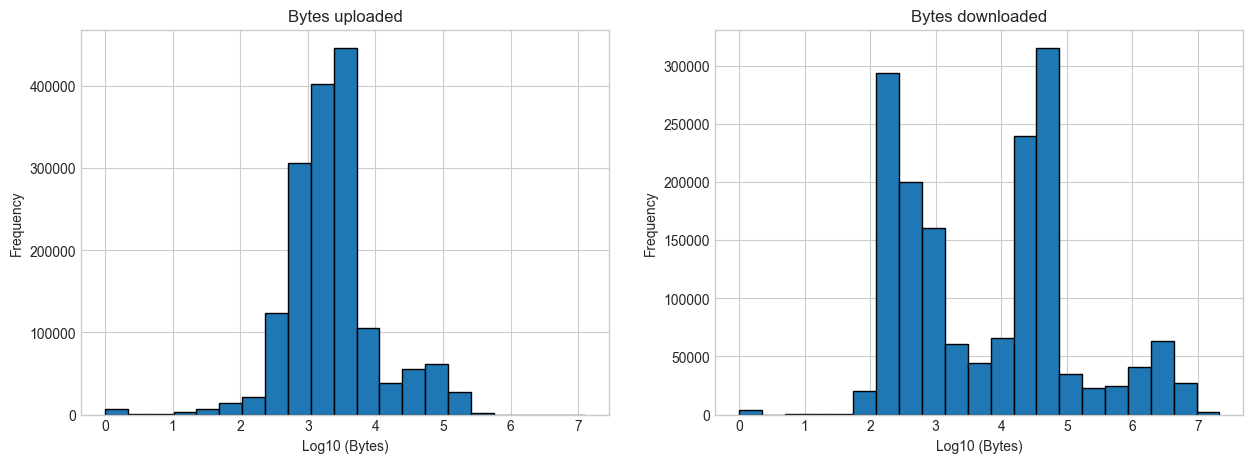

In [9]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

numberBins = bins(chromeCastData["bytes_up"])
plot.subplot(1,2,1)
plot.hist(chromeCastData["bytes_up"], bins = numberBins, ec="black")
plot.title("Bytes uploaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

plot.subplot(1,2,2)
plot.hist(chromeCastData["bytes_down"], bins = numberBins, ec="black")
plot.title("Bytes downloaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

Text(0.5, 1.0, 'Bytes downloaded')

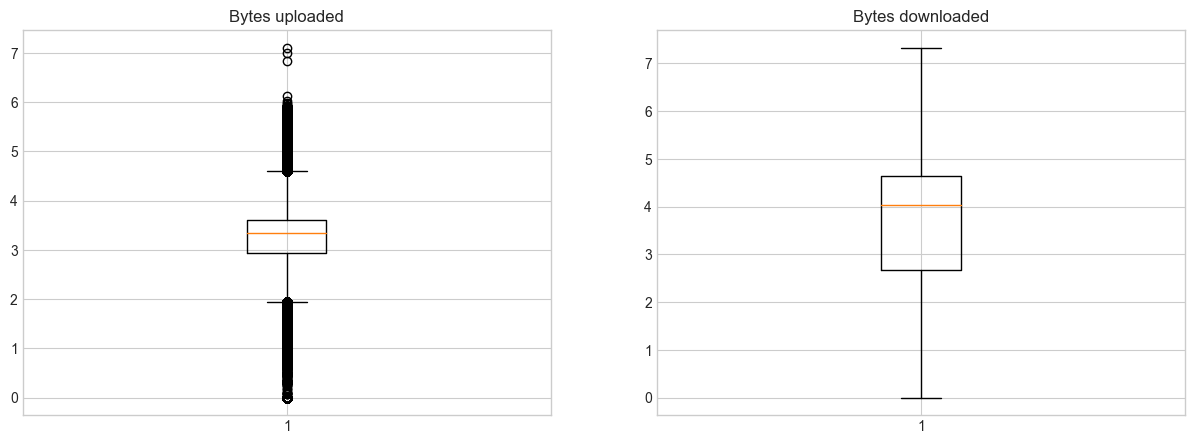

In [10]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)
plot.boxplot(chromeCastData["bytes_up"])
plot.title("Bytes uploaded")

plot.subplot(1,2,2)
plot.boxplot(chromeCastData["bytes_down"])
plot.title("Bytes downloaded")

Text(0.5, 1.0, 'Bytes downloaded')

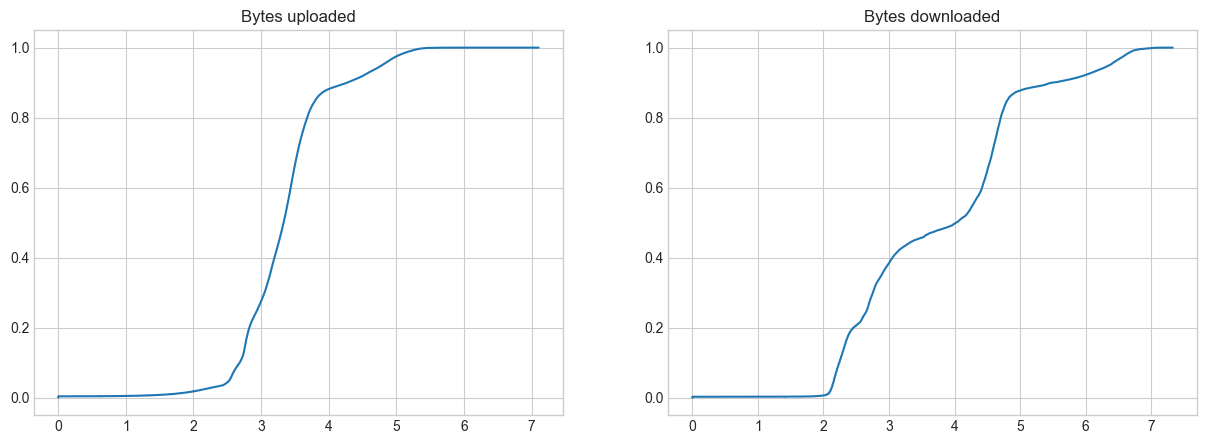

In [11]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)
sortedBytesUp = np.sort(chromeCastData["bytes_up"])
graphSpace = np.arange(len(sortedBytesUp))/float(len(sortedBytesUp))
plot.plot(sortedBytesUp, graphSpace)
plot.title("Bytes uploaded")

plot.subplot(1,2,2)
sortedBytesDown = np.sort(chromeCastData["bytes_down"])
graphSpace = np.arange(len(sortedBytesDown))/float(len(sortedBytesDown))
plot.plot(sortedBytesDown, graphSpace)
plot.title("Bytes downloaded")

## Estatísticas Gerais - Smart TV

In [12]:
print("Mean", round(smartTvData["bytes_up"].mean(),5))
print("Variance", round(smartTvData["bytes_up"].var(),5))
print("Std", round(smartTvData["bytes_up"].std(),5))

Mean 2.15829
Variance 4.11014
Std 2.02735


In [13]:
print("Mean", round(smartTvData["bytes_down"].mean(),5))
print("Variance", round(smartTvData["bytes_down"].var(),5))
print("Std", round(smartTvData["bytes_down"].std(),5))

Mean 2.35168
Variance 6.72132
Std 2.59255


Text(0, 0.5, 'Frequency')

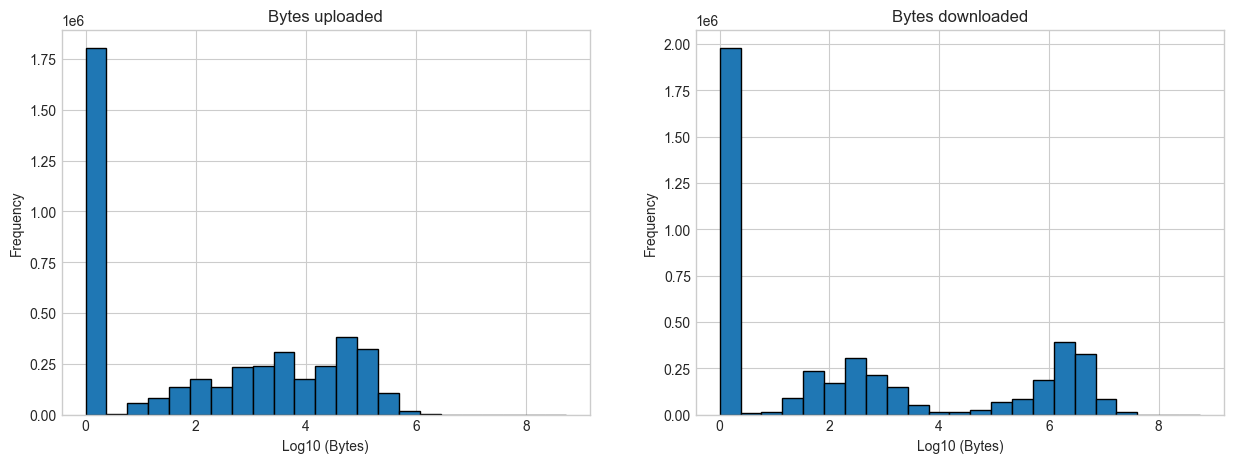

In [14]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

numberBins = bins(smartTvData["bytes_up"])
plot.subplot(1,2,1)
plot.hist(smartTvData["bytes_up"], bins = numberBins, ec="black")
plot.title("Bytes uploaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

plot.subplot(1,2,2)
plot.hist(smartTvData["bytes_down"], bins = numberBins, ec="black")
plot.title("Bytes downloaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

Text(0.5, 1.0, 'Bytes downloaded')

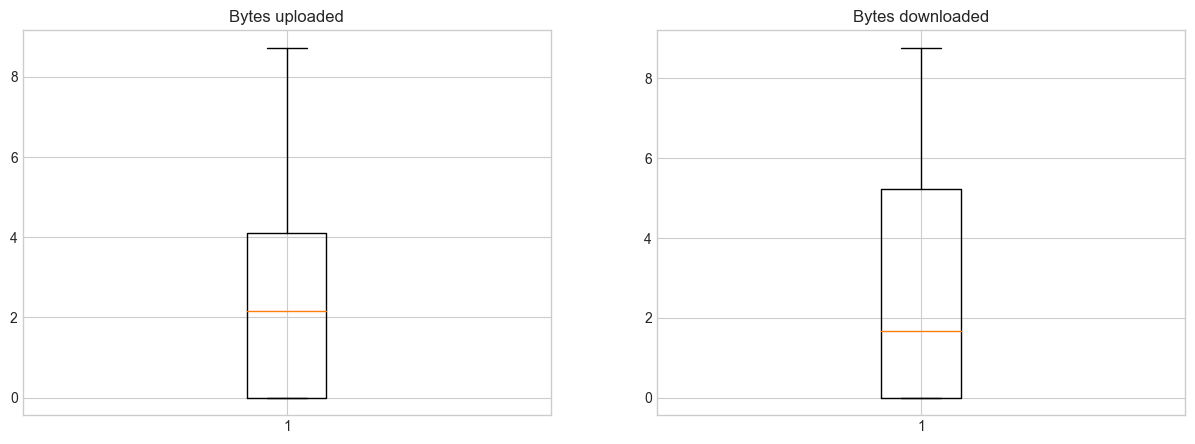

In [15]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)
plot.boxplot(smartTvData["bytes_up"])
plot.title("Bytes uploaded")

plot.subplot(1,2,2)
plot.boxplot(smartTvData["bytes_down"])
plot.title("Bytes downloaded")

Text(0.5, 1.0, 'Bytes downloaded')

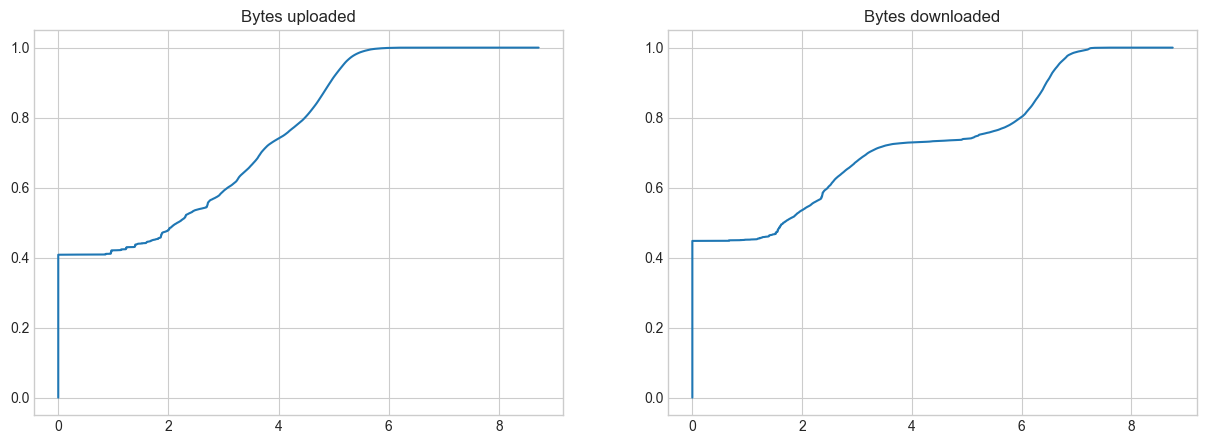

In [16]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)
sortedBytesUp = np.sort(smartTvData["bytes_up"])
graphSpace = np.arange(len(sortedBytesUp))/float(len(sortedBytesUp))
plot.plot(sortedBytesUp, graphSpace)
plot.title("Bytes uploaded")

plot.subplot(1,2,2)
sortedBytesDown = np.sort(smartTvData["bytes_down"])
graphSpace = np.arange(len(sortedBytesDown))/float(len(sortedBytesDown))
plot.plot(sortedBytesDown, graphSpace)
plot.title("Bytes downloaded")

## Estatísticas por Horário - Chrome Cast

In [17]:
chromeCastData["hour"] = chromeCastData["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0])
)
chromeCastData

,device_id,date_hour,bytes_up,bytes_down,hour
0,66161985,2021-09-06 00:01:00,3.475383,4.691848,0
1,66161985,2021-09-06 00:02:00,2.836916,2.517536,0
2,66161985,2021-09-06 00:03:00,3.652720,4.578812,0
3,66161985,2021-09-06 00:04:00,2.890496,2.362105,0
4,66161985,2021-09-06 00:05:00,3.488877,4.713136,0
...,...,...,...,...,...
1620524,90339988,2021-11-26 16:52:00,3.306425,4.637820,16
1620525,90339988,2021-11-26 16:53:00,3.850585,3.202216,16
1620526,90339988,2021-11-26 16:54:00,2.689309,4.695771,16
1620527,90339988,2021-11-26 16:55:00,0.000000,2.136721,16


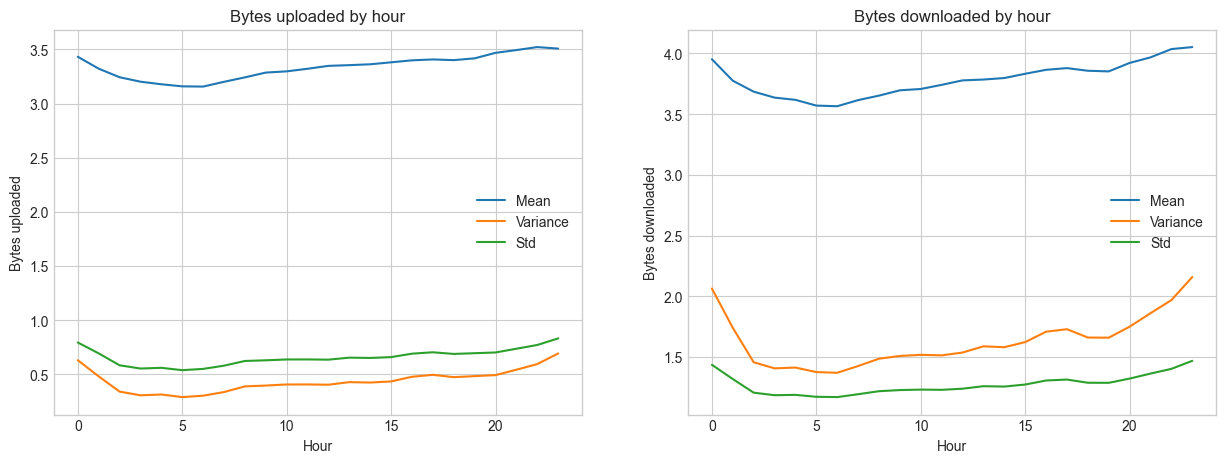

In [18]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

chromeCastByHour = chromeCastData.groupby("hour")

plot.subplot(1,2,1)
plot.plot(chromeCastByHour["bytes_up"].mean(), label="Mean")
plot.plot(chromeCastByHour["bytes_up"].var(), label="Variance")
plot.plot(chromeCastByHour["bytes_up"].std(), label="Std")
plot.xlabel("Hour")
plot.ylabel("Bytes uploaded")
plot.title("Bytes uploaded by hour")
plot.legend()

plot.subplot(1,2,2)
plot.plot(chromeCastByHour["bytes_down"].mean(), label="Mean")
plot.plot(chromeCastByHour["bytes_down"].var(), label="Variance")
plot.plot(chromeCastByHour["bytes_down"].std(), label="Std")
plot.xlabel("Hour")
plot.ylabel("Bytes downloaded")
plot.title("Bytes downloaded by hour")
plot.legend()

/var/folders/qz/vx96r_gn49b_gvkbw298jx1czzgn4v/T/ipykernel_68065/810669146.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot.figure()


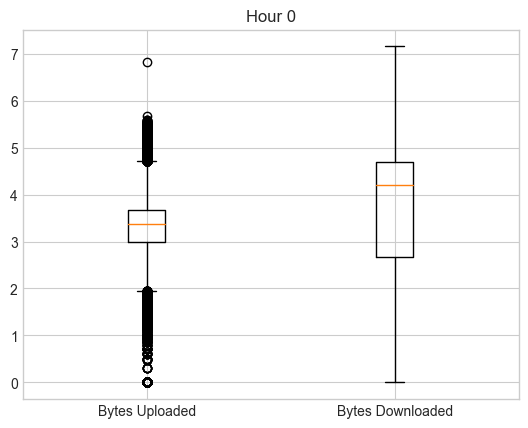

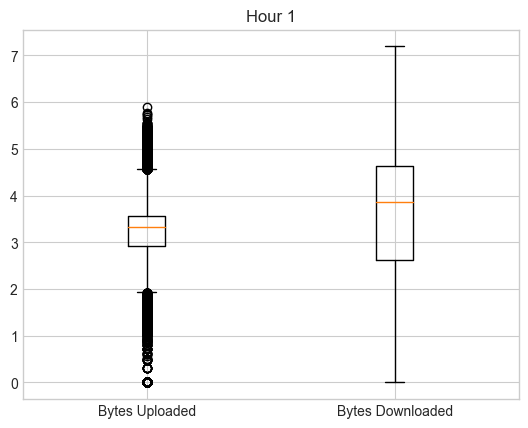

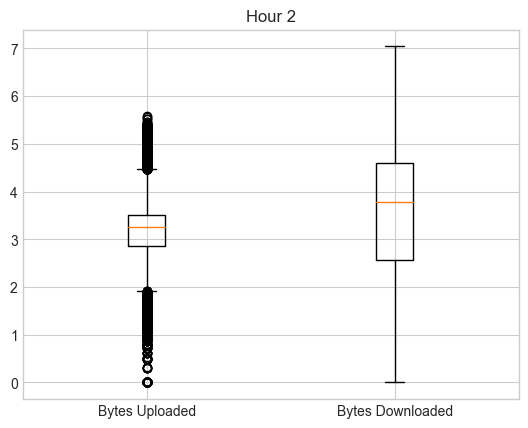

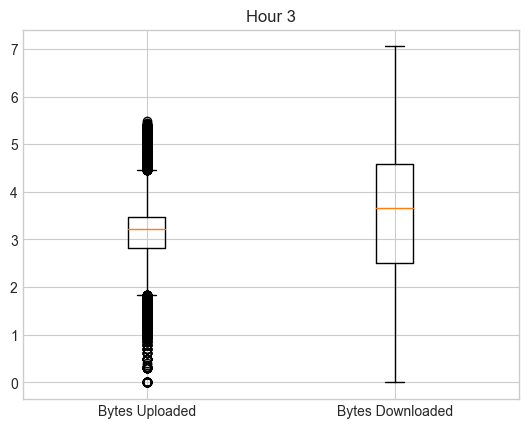

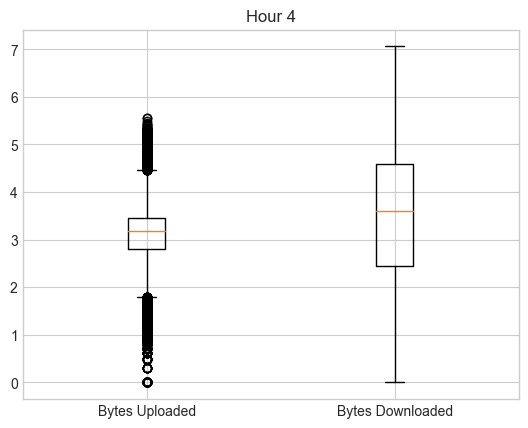

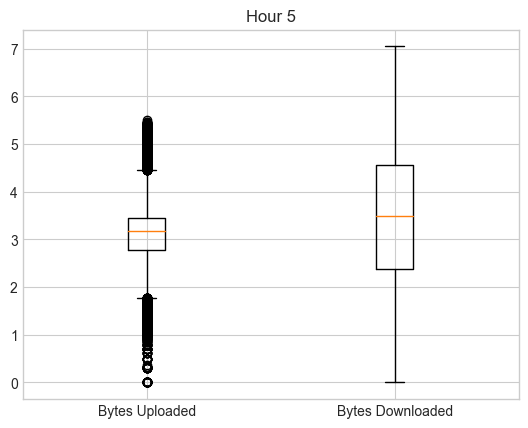

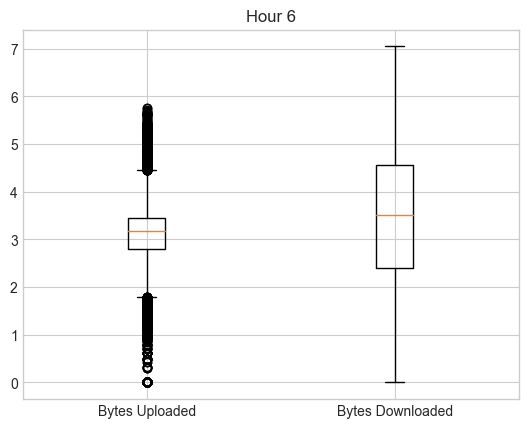

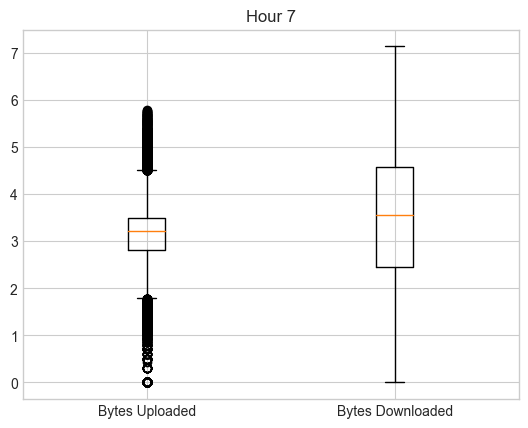

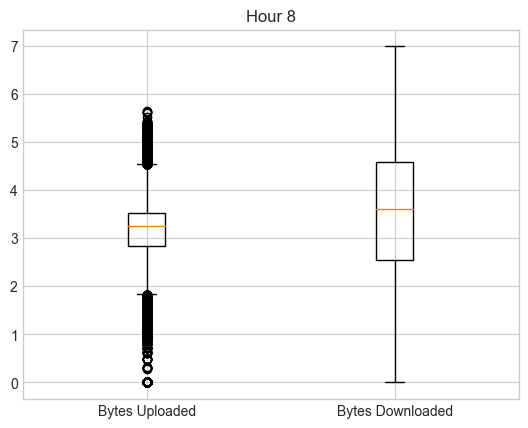

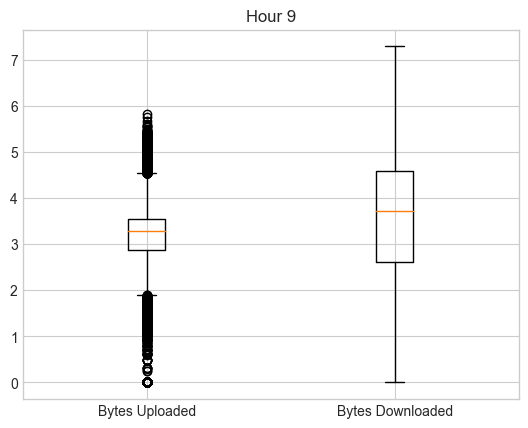

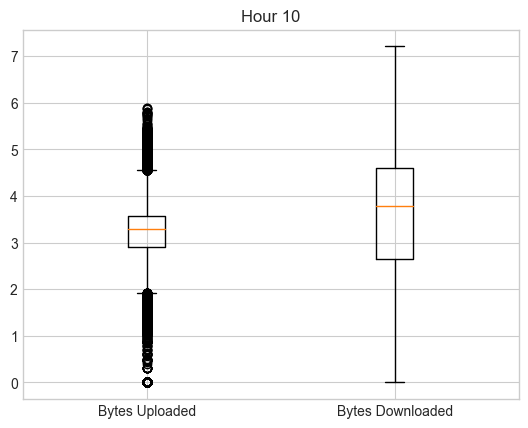

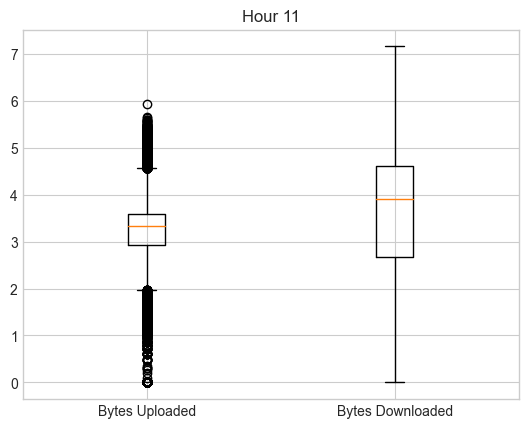

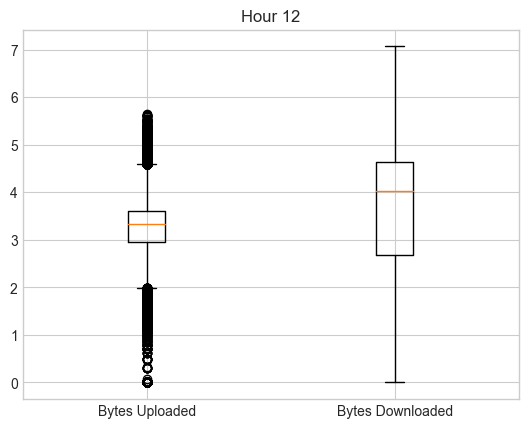

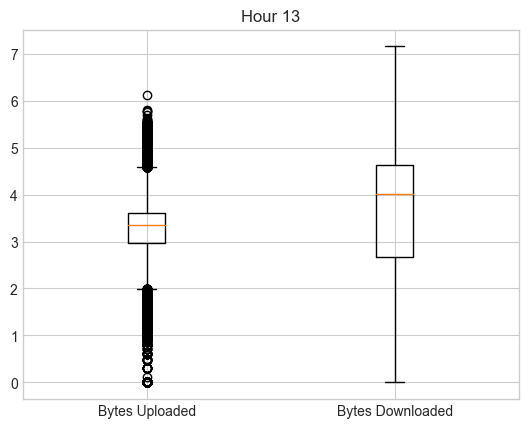

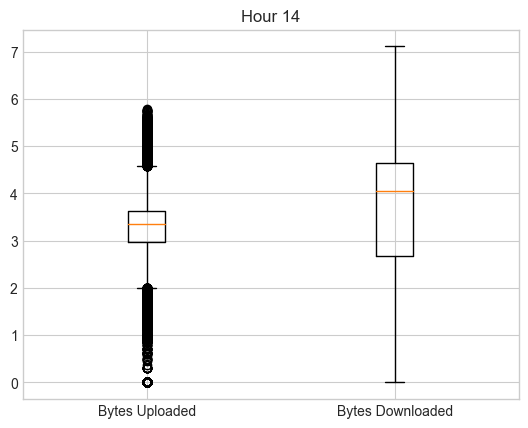

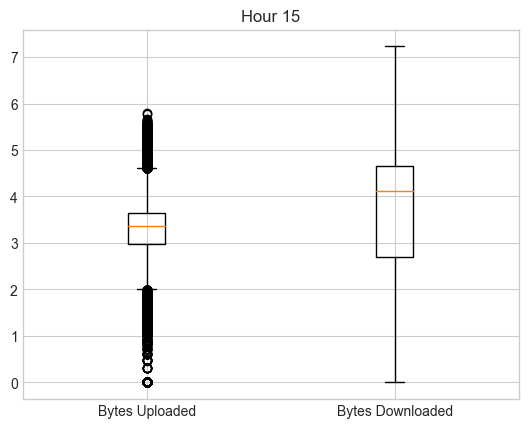

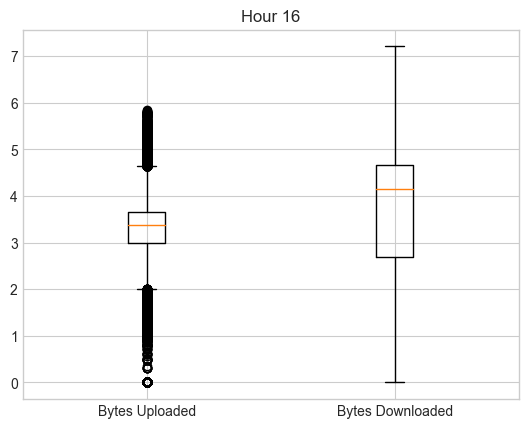

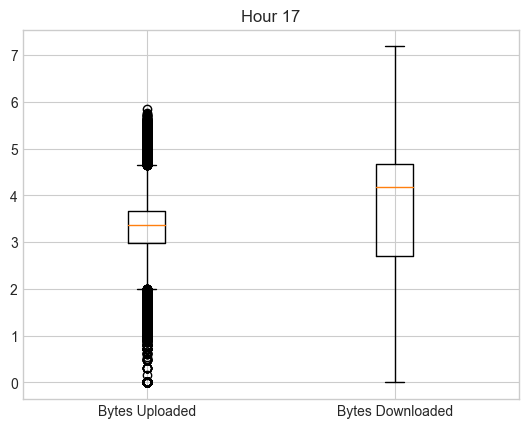

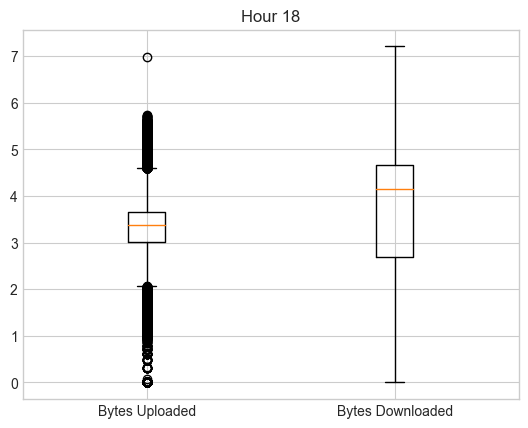

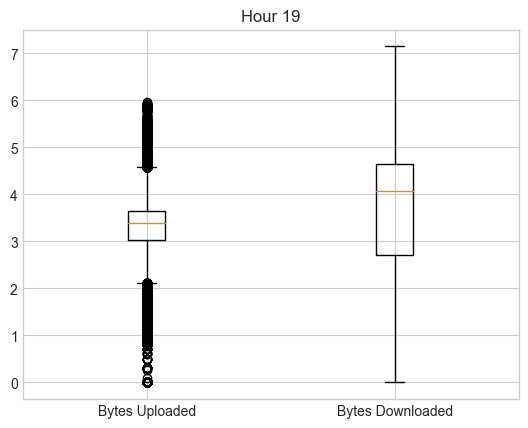

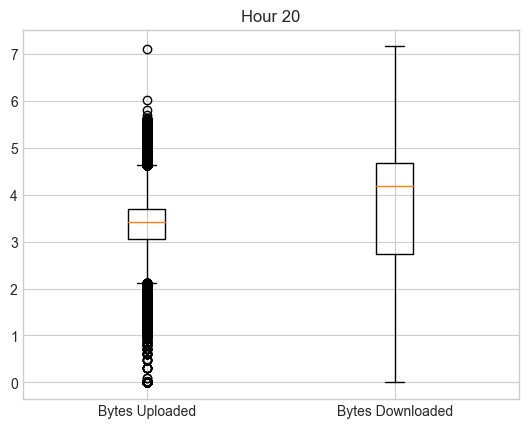

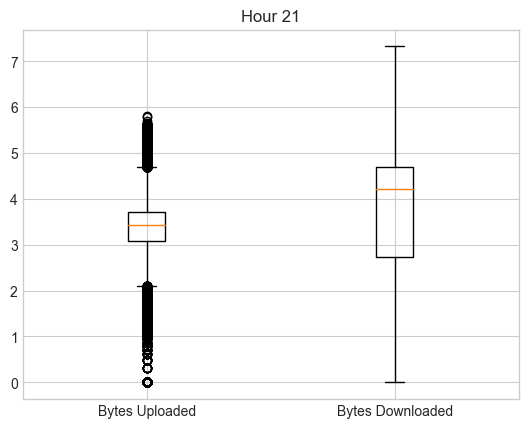

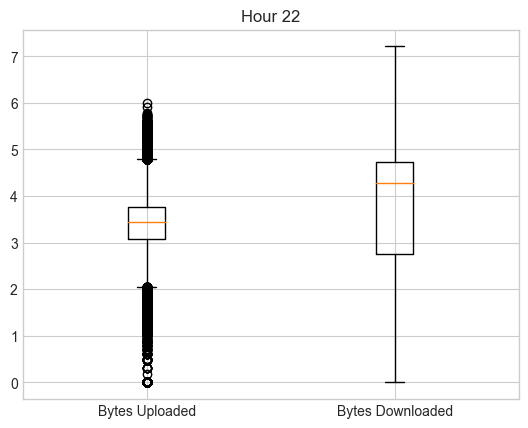

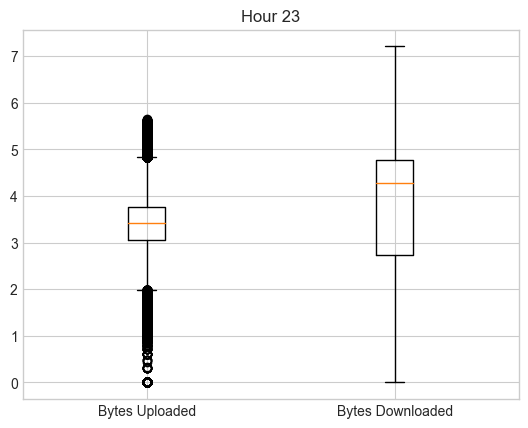

In [19]:
style.use("seaborn-whitegrid")

for hour in range(0, 24):
    plot.figure()
    plot.boxplot(        
        [
            chromeCastData[chromeCastData["hour"] == hour]["bytes_up"],
            chromeCastData[chromeCastData["hour"] == hour]["bytes_down"],
        ],
        labels=["Bytes Uploaded", "Bytes Downloaded"],
    )
    plot.title("Hour " + str(hour))


## Estatísticas por Horário - Smart TV

In [20]:
smartTvData["hour"] = smartTvData["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0])
)
chromeCastData

,device_id,date_hour,bytes_up,bytes_down,hour
0,66161985,2021-09-06 00:01:00,3.475383,4.691848,0
1,66161985,2021-09-06 00:02:00,2.836916,2.517536,0
2,66161985,2021-09-06 00:03:00,3.652720,4.578812,0
3,66161985,2021-09-06 00:04:00,2.890496,2.362105,0
4,66161985,2021-09-06 00:05:00,3.488877,4.713136,0
...,...,...,...,...,...
1620524,90339988,2021-11-26 16:52:00,3.306425,4.637820,16
1620525,90339988,2021-11-26 16:53:00,3.850585,3.202216,16
1620526,90339988,2021-11-26 16:54:00,2.689309,4.695771,16
1620527,90339988,2021-11-26 16:55:00,0.000000,2.136721,16


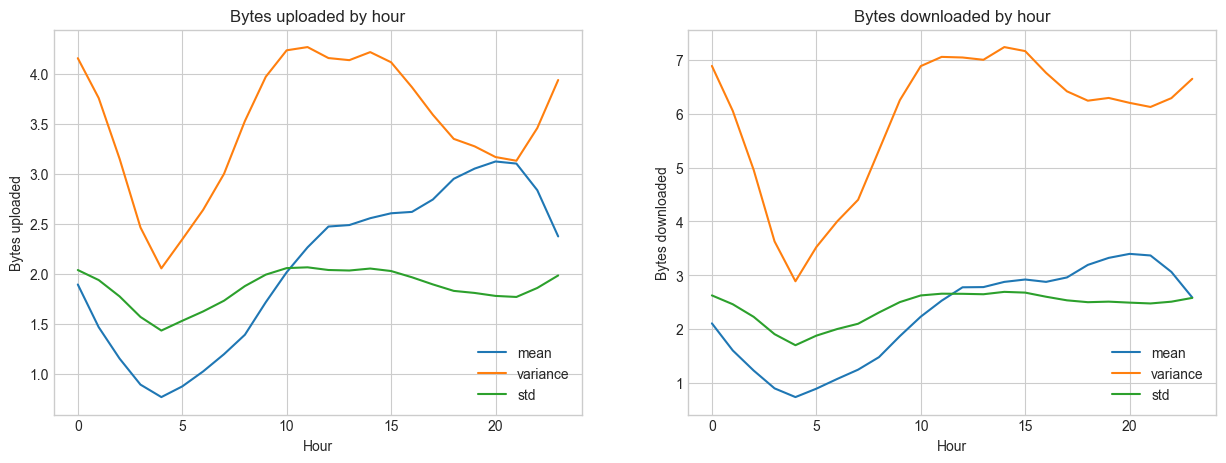

In [21]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

smartTvByHour = smartTvData.groupby("hour")

plot.subplot(1,2,1)
plot.plot(smartTvByHour["bytes_up"].mean(), label="mean")
plot.plot(smartTvByHour["bytes_up"].var(), label="variance")
plot.plot(smartTvByHour["bytes_up"].std(), label="std")
plot.xlabel("Hour")
plot.ylabel("Bytes uploaded")
plot.title("Bytes uploaded by hour")
plot.legend()

plot.subplot(1,2,2)
plot.plot(smartTvByHour["bytes_down"].mean(), label="mean")
plot.plot(smartTvByHour["bytes_down"].var(), label="variance")
plot.plot(smartTvByHour["bytes_down"].std(), label="std")
plot.xlabel("Hour")
plot.ylabel("Bytes downloaded")
plot.title("Bytes downloaded by hour")
plot.legend()

/var/folders/qz/vx96r_gn49b_gvkbw298jx1czzgn4v/T/ipykernel_68065/3816377526.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot.figure()


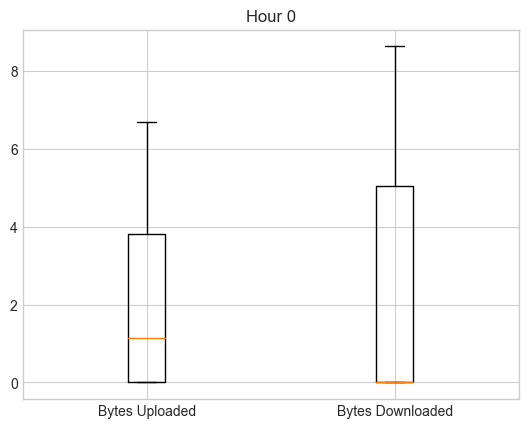

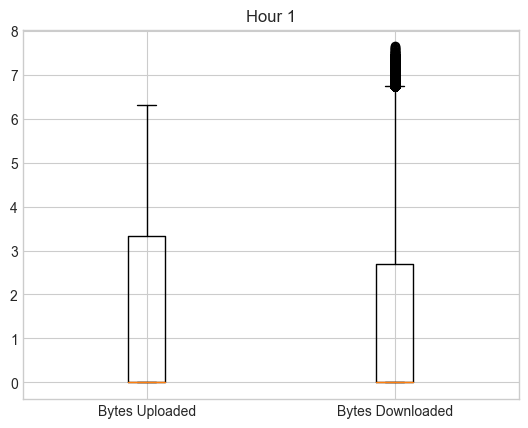

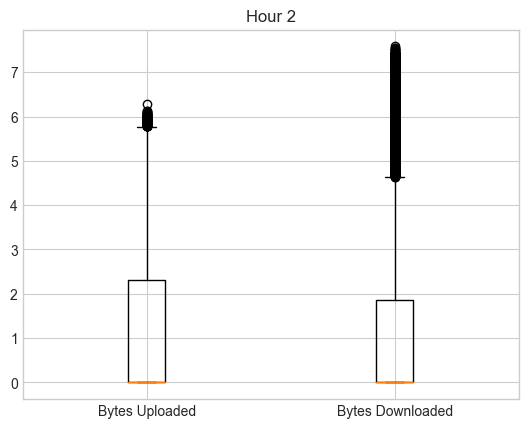

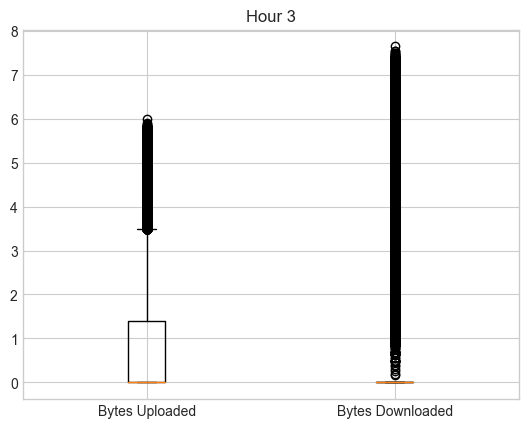

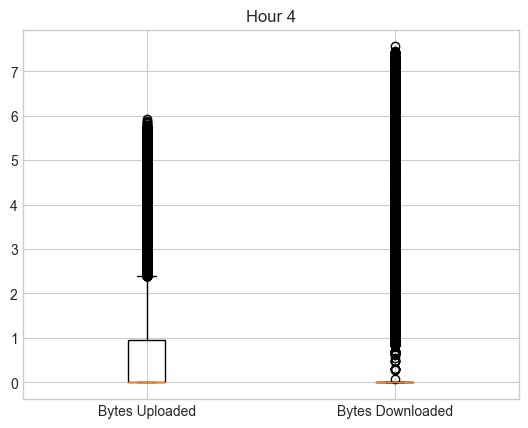

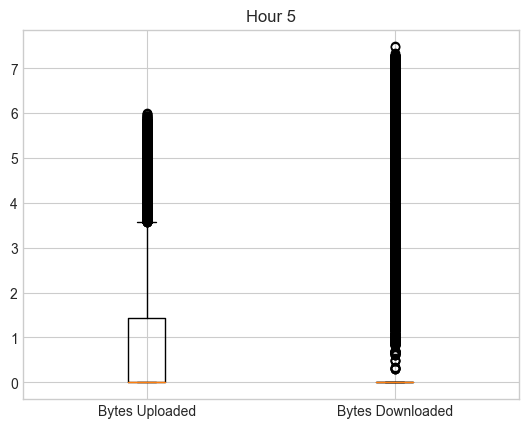

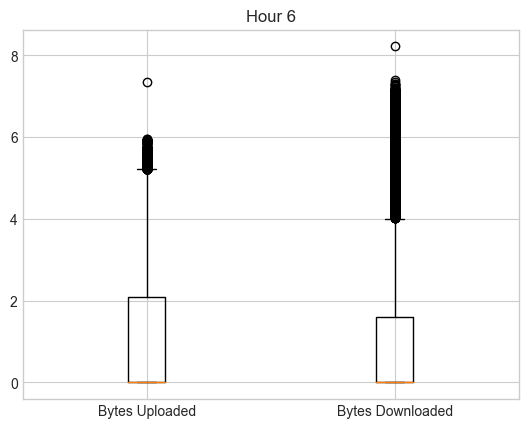

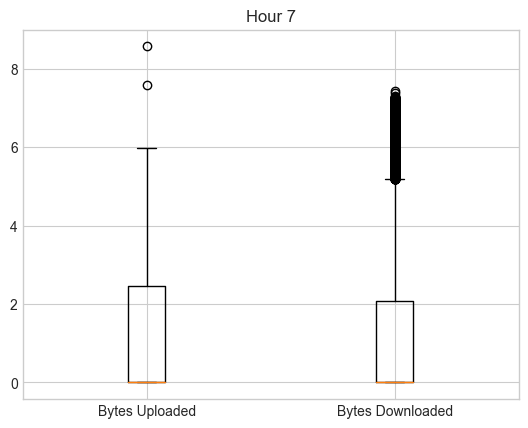

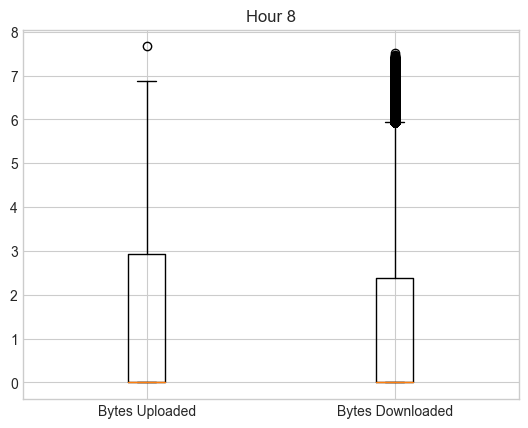

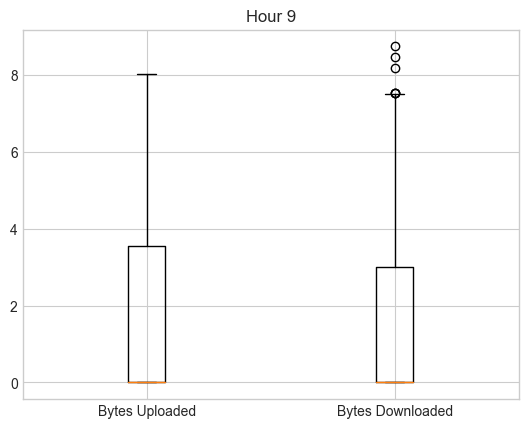

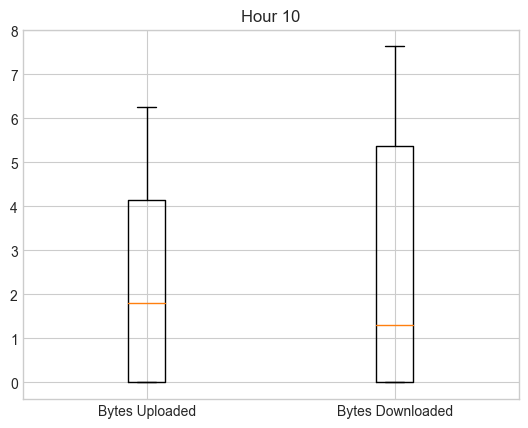

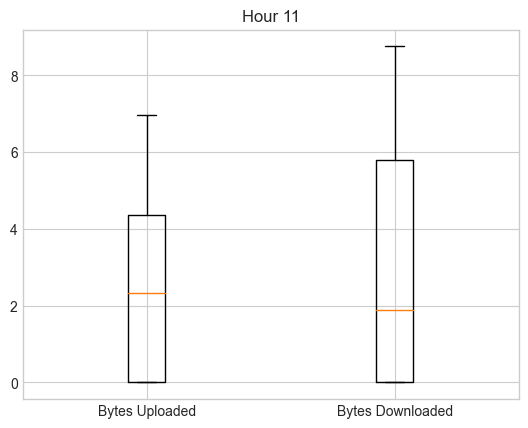

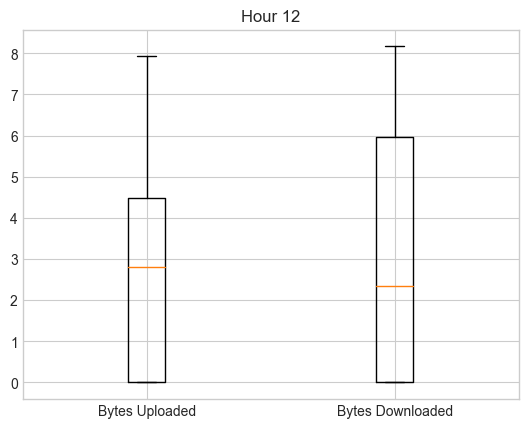

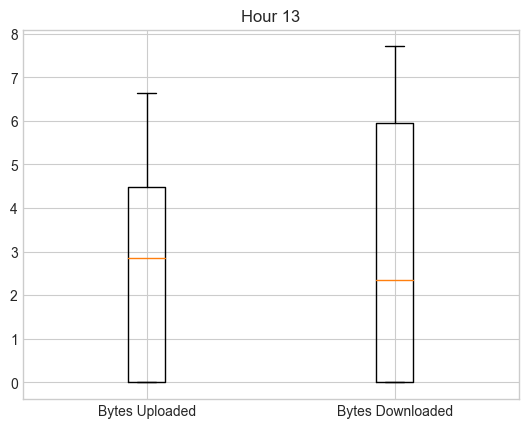

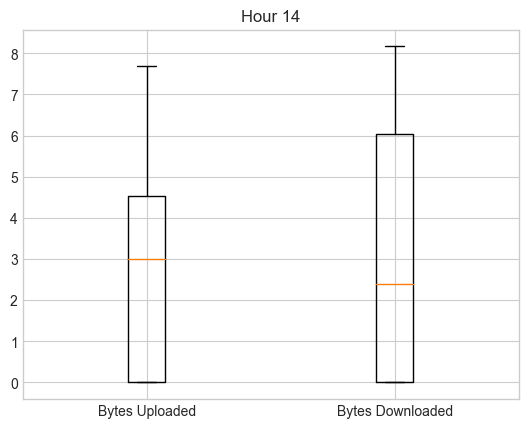

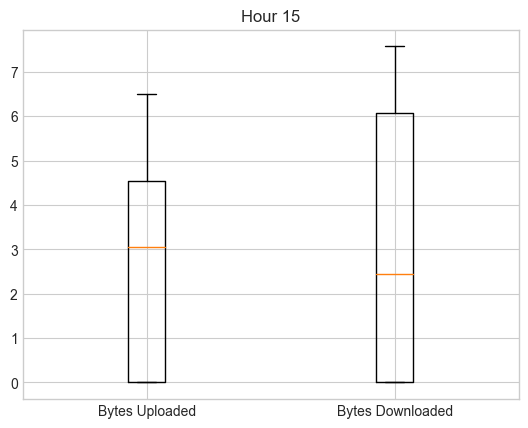

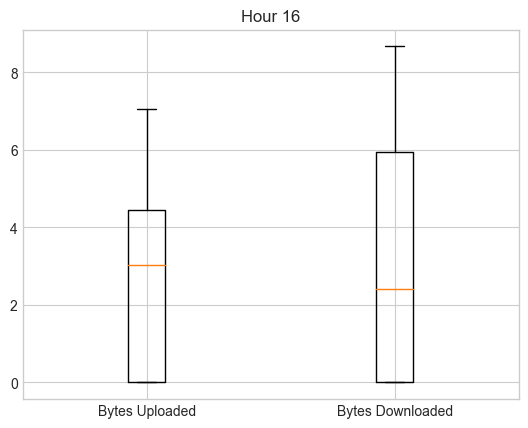

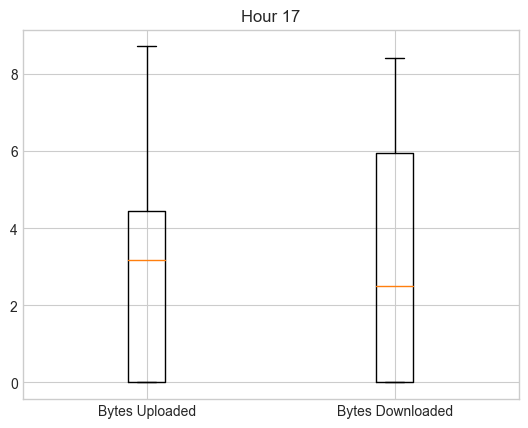

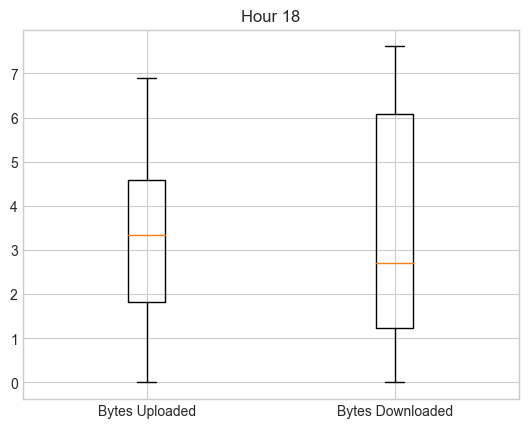

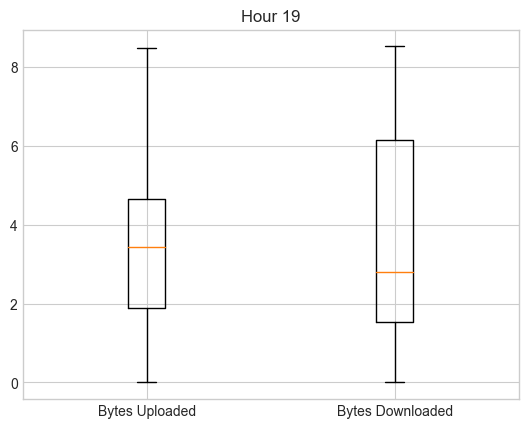

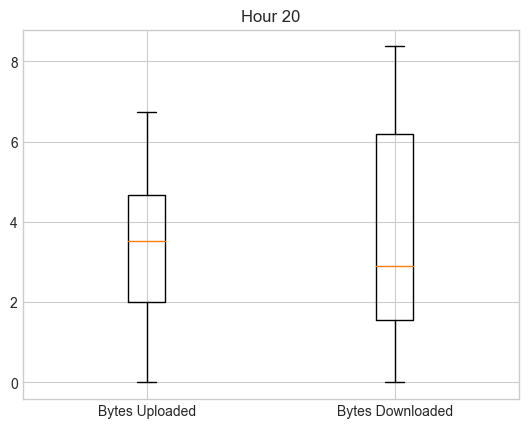

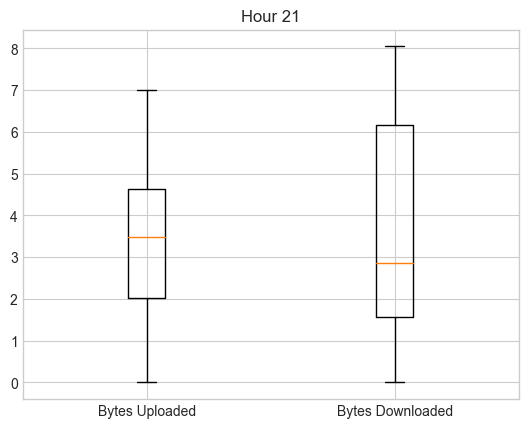

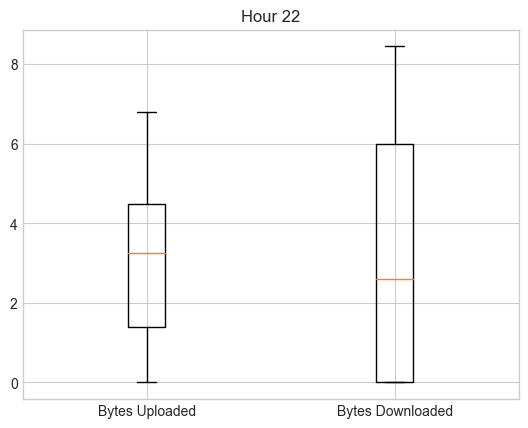

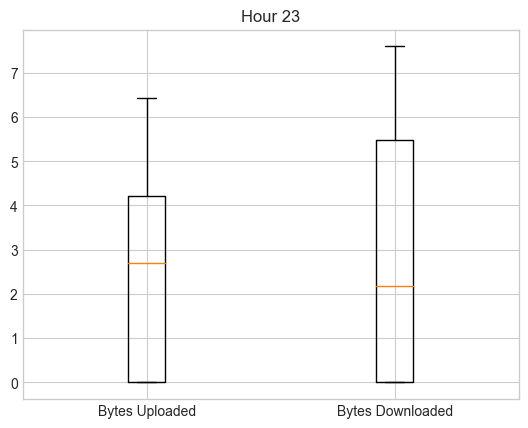

In [22]:
style.use("seaborn-whitegrid")

for hour in range(0, 24):
    plot.figure()
    plot.boxplot(        
        [
            smartTvData[smartTvData["hour"] == hour]["bytes_up"],
            smartTvData[smartTvData["hour"] == hour]["bytes_down"],
        ],
        labels=["Bytes Uploaded", "Bytes Downloaded"],
    )
    plot.title("Hour " + str(hour))


## Caracterização dos horários com maior valor de tráfego - Chrome Cast

In [23]:
chromeCastMedianUpHour = chromeCastByHour["bytes_up"].median().idxmax()
chromeCastMeanUpHour = chromeCastByHour["bytes_up"].mean().idxmax()
chromeCastMedianDownHour = chromeCastByHour["bytes_down"].median().idxmax()
chromeCastMeanDownHour = chromeCastByHour["bytes_down"].mean().idxmax()

chromeCastMedianUp = chromeCastData[chromeCastData["hour"] == chromeCastMedianUpHour][["hour", "bytes_up", "bytes_down"]]
chromeCastMeanUp = chromeCastData[chromeCastData["hour"] == chromeCastMeanUpHour][["hour", "bytes_up", "bytes_down"]]
chromeCastMedianDown = chromeCastData[chromeCastData["hour"] == chromeCastMedianDownHour][["hour", "bytes_up", "bytes_down"]]
chromeCastMeanDown = chromeCastData[chromeCastData["hour"] == chromeCastMeanDownHour][["hour", "bytes_up", "bytes_down"]]

print("Max Median Upload Hour: ", chromeCastMedianUpHour)
print("Max Mean Up Hour: ", chromeCastMeanUpHour)
print("Max Median Down Hour: ", chromeCastMedianDownHour)
print("Max Mean Down Hour: ", chromeCastMeanDownHour)

Max Median Upload Hour:  22
Max Mean Up Hour:  22
Max Median Down Hour:  23
Max Mean Down Hour:  23


Text(0, 0.5, 'Frequency')

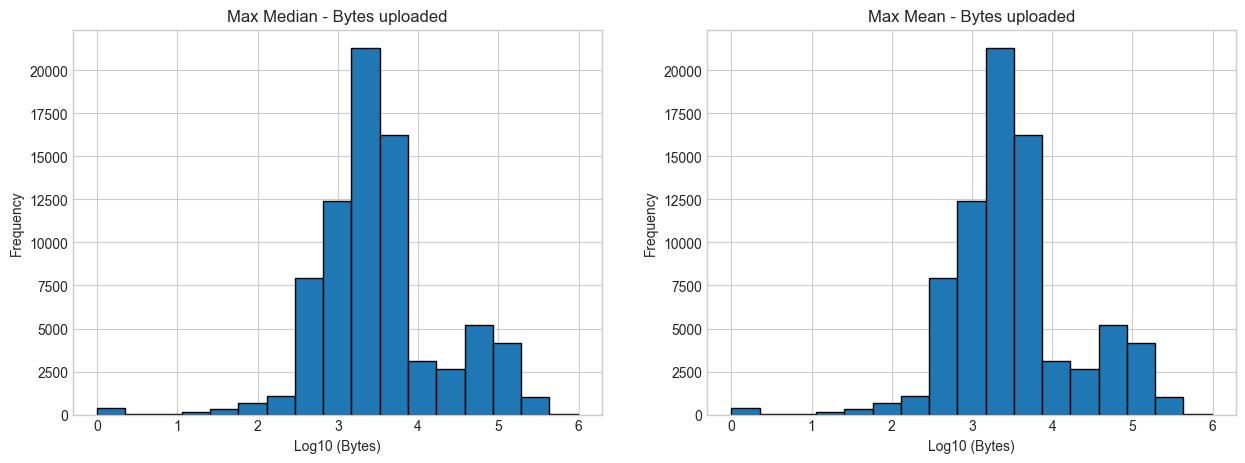

In [24]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

numberBins = bins(chromeCastMedianUp["bytes_up"])
plot.subplot(1,2,1)
plot.hist(chromeCastMedianUp["bytes_up"], bins = numberBins, ec="black")
plot.title("Max Median - Bytes uploaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

numberBins = bins(chromeCastMeanUp["bytes_up"])
plot.subplot(1,2,2)
plot.hist(chromeCastMeanUp["bytes_up"], bins = numberBins, ec="black")
plot.title("Max Mean - Bytes uploaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

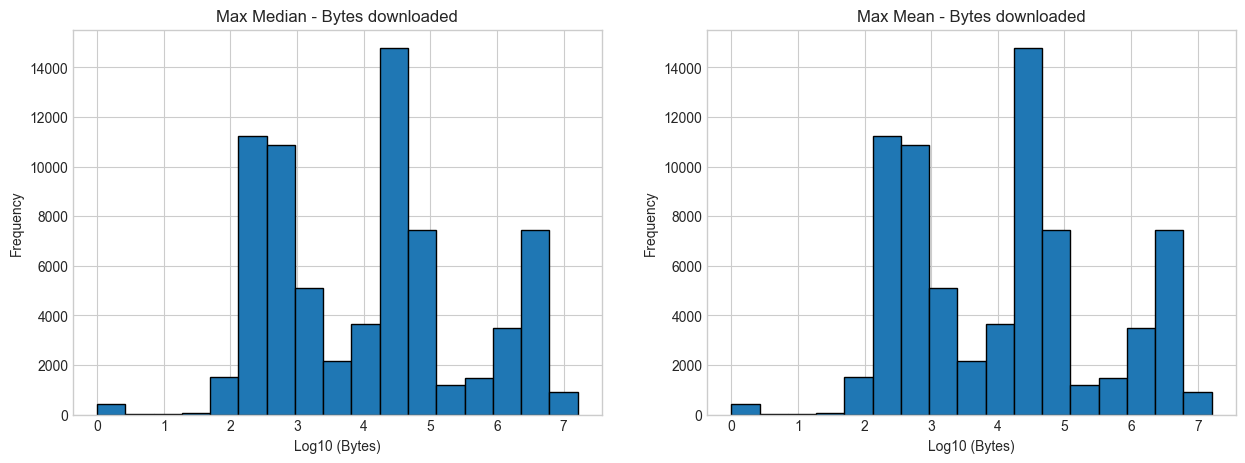

In [25]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

numberBins = bins(chromeCastMedianDown["bytes_down"])
plot.subplot(1,2,1)
plot.hist(chromeCastMedianDown["bytes_down"], bins = numberBins, ec="black")
plot.title("Max Median - Bytes downloaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

numberBins = bins(chromeCastMeanDown["bytes_down"])
plot.subplot(1,2,2)
plot.hist(chromeCastMeanDown["bytes_down"], bins = numberBins, ec="black")
plot.title("Max Mean - Bytes downloaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

### Gaussian Distribution

In [26]:
chromeCastMedianUpMean, chromeCastMedianUpStd = norm.fit(chromeCastMedianUp["bytes_up"])
chromeCastMeanUpMean, chromeCastMeanUpStd = norm.fit(chromeCastMeanUp["bytes_up"])
chromeCastMedianDownMean, chromeCastMedianDownStd = norm.fit(chromeCastMedianDown["bytes_down"])
chromeCastMeanDownMean, chromeCastMeanDownStd = norm.fit(chromeCastMeanDown["bytes_down"])

print("Median Up - Gaussian Distribution: ")
print(f"Mean: {round(chromeCastMedianUpMean, 5)} | Standard Deviation: {round(chromeCastMedianUpStd, 5)}\n")

print("Mean Up - Gaussian Distribution: ")
print(f"Mean: {round(chromeCastMeanUpMean, 5)} | Standard Deviation: {round(chromeCastMeanUpStd, 5)}\n")

print("Median Down - Gaussian Distribution: ")
print(f"Mean: {round(chromeCastMedianDownMean, 5)} | Standard Deviation: {round(chromeCastMedianDownStd, 5)}\n")

print("Mean Down - Gaussian Distribution: ")
print(f"Mean: {round(chromeCastMeanDownMean, 5)} | Standard Deviation: {round(chromeCastMeanDownStd, 5)}\n")

Median Up - Gaussian Distribution: 
Mean: 3.52155 | Standard Deviation: 0.77182

Mean Up - Gaussian Distribution: 
Mean: 3.52155 | Standard Deviation: 0.77182

Median Down - Gaussian Distribution: 
Mean: 4.0527 | Standard Deviation: 1.46948

Mean Down - Gaussian Distribution: 
Mean: 4.0527 | Standard Deviation: 1.46948



### Gamma Distribution

In [27]:
chromeCastMedianUpShape, chromeCastMedianUpLocation, chromeCastMedianUpScale = gamma.fit(chromeCastMedianUp["bytes_up"])
chromeCastMeanUpShape, chromeCastMeanUpLocation, chromeCastMeanUpScale = gamma.fit(chromeCastMeanUp["bytes_up"])
chromeCastMedianDownShape, chromeCastMedianDownLocation, chromeCastMedianDownScale = gamma.fit(chromeCastMedianDown["bytes_down"])
chromeCastMeanDownShape, chromeCastMeanDownLocation, chromeCastMeanDownScale = gamma.fit(chromeCastMeanDown["bytes_down"])

print("Median Up - Gamma Distribution: ")
print(f"Scale: {round(chromeCastMedianUpScale, 5)} | Shape: {round(chromeCastMedianUpShape, 5)} | Location: {round(chromeCastMedianUpLocation, 5)}\n")

print("Mean Up - Gamma Distribution: ")
print(f"Scale: {round(chromeCastMeanUpScale, 5)} | Shape: {round(chromeCastMeanUpShape, 5)} | Location: {round(chromeCastMeanUpLocation, 5)}\n")

print("Median Down - Gamma Distribution: ")
print(f"Scale: {round(chromeCastMedianDownScale, 5)} | Shape: {round(chromeCastMedianDownShape, 5)} | Location: {round(chromeCastMedianDownLocation, 5)}\n")

print("Mean Down - Gamma Distribution: ")
print(f"Scale: {round(chromeCastMeanDownScale, 5)} | Shape: {round(chromeCastMeanDownShape, 5)} | Location: {round(chromeCastMeanDownLocation, 5)}\n")

Median Up - Gamma Distribution: 
Scale: 0.01376 | Shape: 3148.88152 | Location: -39.80898

Mean Up - Gamma Distribution: 
Scale: 0.01376 | Shape: 3148.88152 | Location: -39.80898

Median Down - Gamma Distribution: 
Scale: 0.28323 | Shape: 27.13014 | Location: -3.63137

Mean Down - Gamma Distribution: 
Scale: 0.28323 | Shape: 27.13014 | Location: -3.63137



### Histogram with distributions

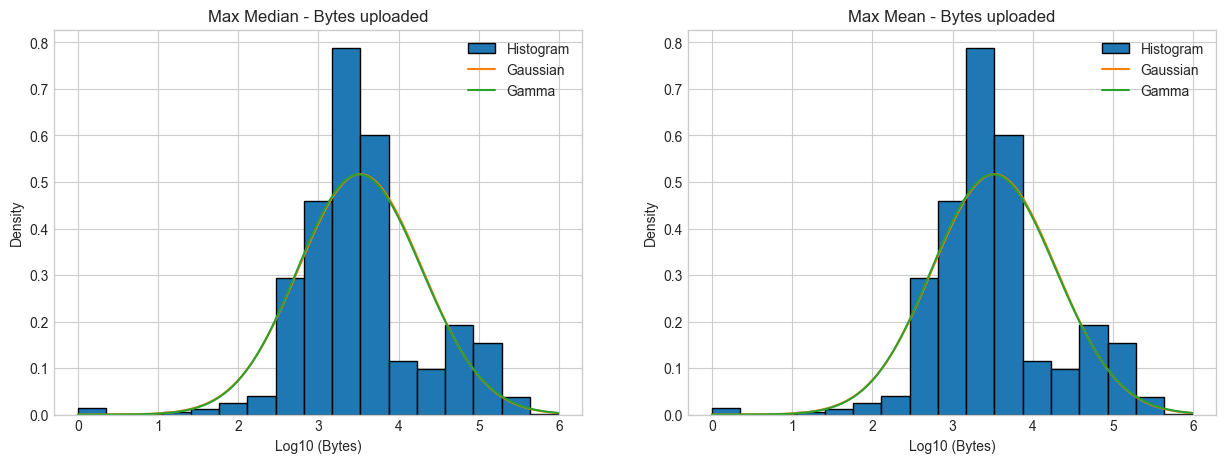

In [28]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)

dataset = chromeCastMedianUp["bytes_up"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpaceNorm = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpaceNorm, chromeCastMedianUpMean, chromeCastMedianUpStd)
plot.plot(graphSpaceNorm, pdf, label="Gaussian")

graphSpaceGamma = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpaceGamma, chromeCastMedianUpShape, chromeCastMedianUpLocation, chromeCastMedianUpScale)
plot.plot(graphSpaceGamma, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Median - Bytes uploaded")
plot.legend()


plot.subplot(1,2,2)

dataset = chromeCastMeanUp["bytes_up"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpace = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpace, chromeCastMeanUpMean, chromeCastMeanUpStd)
plot.plot(graphSpace, pdf, label="Gaussian")

graphSpace = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpace, chromeCastMeanUpShape, chromeCastMeanUpLocation, chromeCastMeanUpScale)
plot.plot(graphSpace, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Mean - Bytes uploaded")
plot.legend()

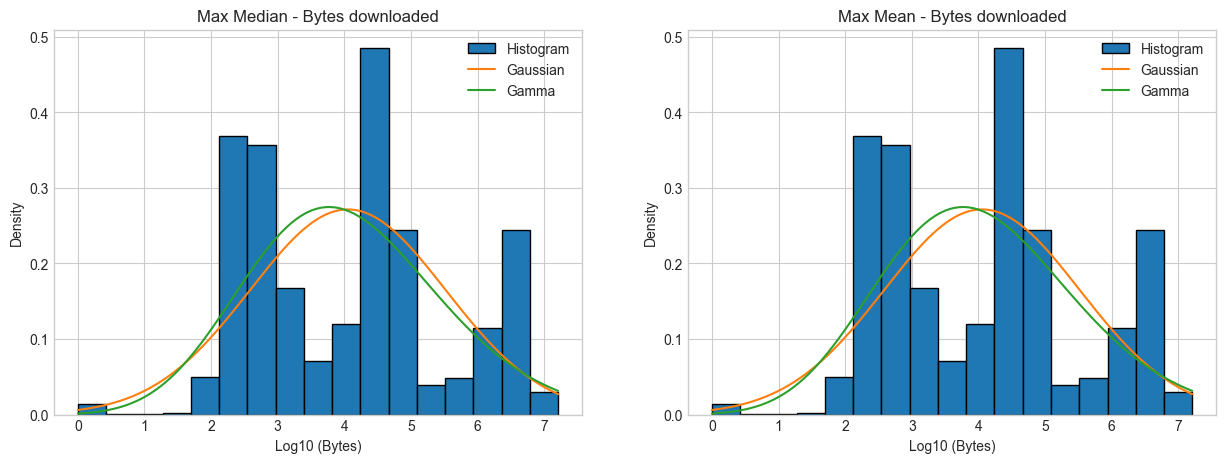

In [29]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)

dataset = chromeCastMedianDown["bytes_down"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpace = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpace, chromeCastMedianDownMean, chromeCastMedianDownStd)
plot.plot(graphSpace, pdf, label="Gaussian")

graphSpace = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpace, chromeCastMedianDownShape, chromeCastMedianDownLocation, chromeCastMedianDownScale)
plot.plot(graphSpace, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Median - Bytes downloaded")
plot.legend()


plot.subplot(1,2,2)

dataset = chromeCastMeanDown["bytes_down"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpace = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpace, chromeCastMeanDownMean, chromeCastMeanDownStd)
plot.plot(graphSpace, pdf, label="Gaussian")

graphSpace = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpace, chromeCastMeanDownShape, chromeCastMeanDownLocation, chromeCastMeanDownScale)
plot.plot(graphSpace, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Mean - Bytes downloaded")
plot.legend()

### Probability plots

Text(0.5, 1.0, 'Max Median - Bytes uploaded - Gamma Distribution')

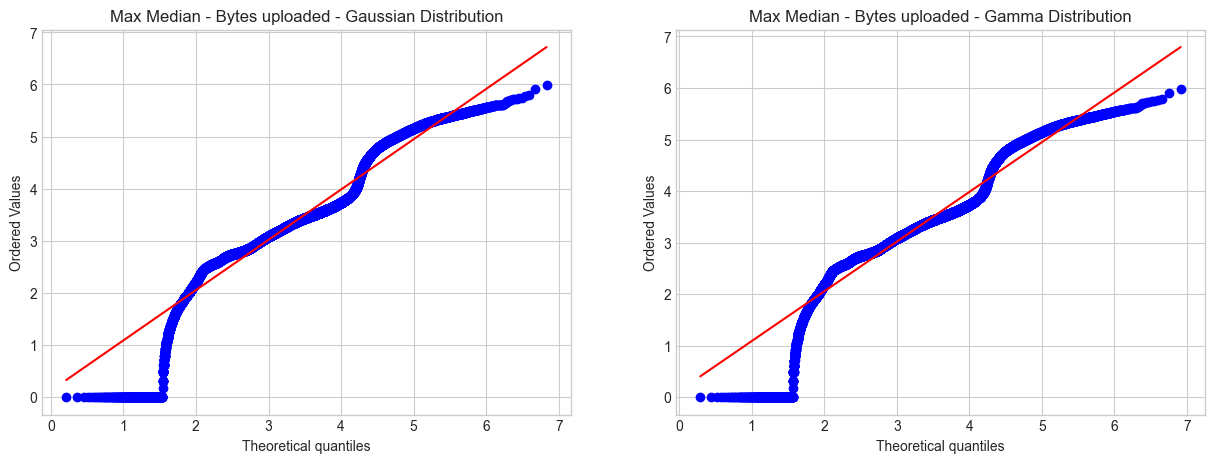

In [30]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = chromeCastMedianUp["bytes_up"]

probplot(dataset, dist=norm, sparams=(chromeCastMedianUpMean, chromeCastMedianUpStd), plot=axes[0])
axes[0].set_title('Max Median - Bytes uploaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(chromeCastMedianUpShape, chromeCastMedianUpLocation, chromeCastMedianUpScale), plot=axes[1])
axes[1].set_title('Max Median - Bytes uploaded - Gamma Distribution')


Text(0.5, 1.0, 'Max Mean - Bytes uploaded - Gamma Distribution')

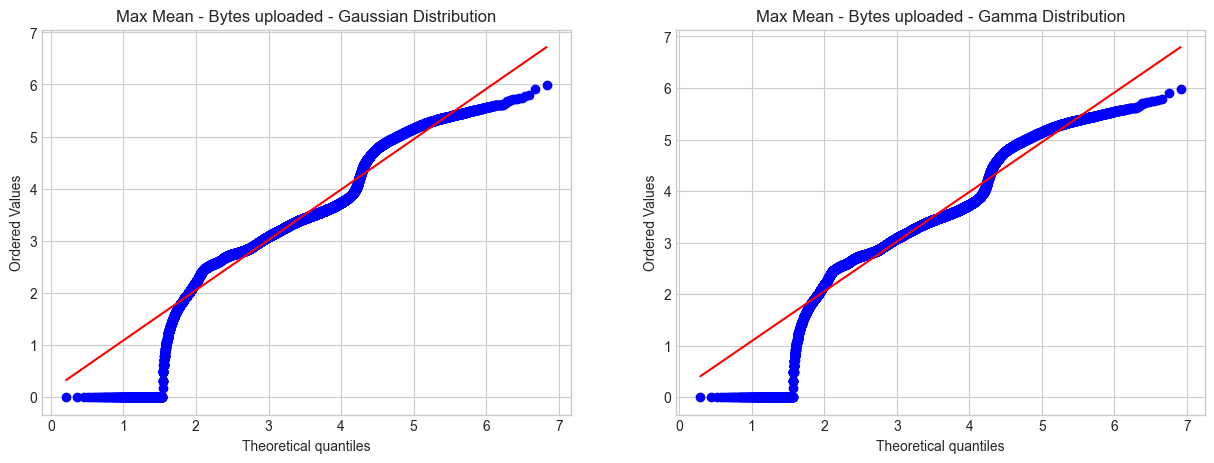

In [31]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = chromeCastMeanUp["bytes_up"]

probplot(dataset, dist=norm, sparams=(chromeCastMeanUpMean, chromeCastMeanUpStd), plot=axes[0])
axes[0].set_title('Max Mean - Bytes uploaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(chromeCastMeanUpShape, chromeCastMeanUpLocation, chromeCastMeanUpScale), plot=axes[1])
axes[1].set_title('Max Mean - Bytes uploaded - Gamma Distribution')


Text(0.5, 1.0, 'Max Median - Bytes downloaded - Gamma Distribution')

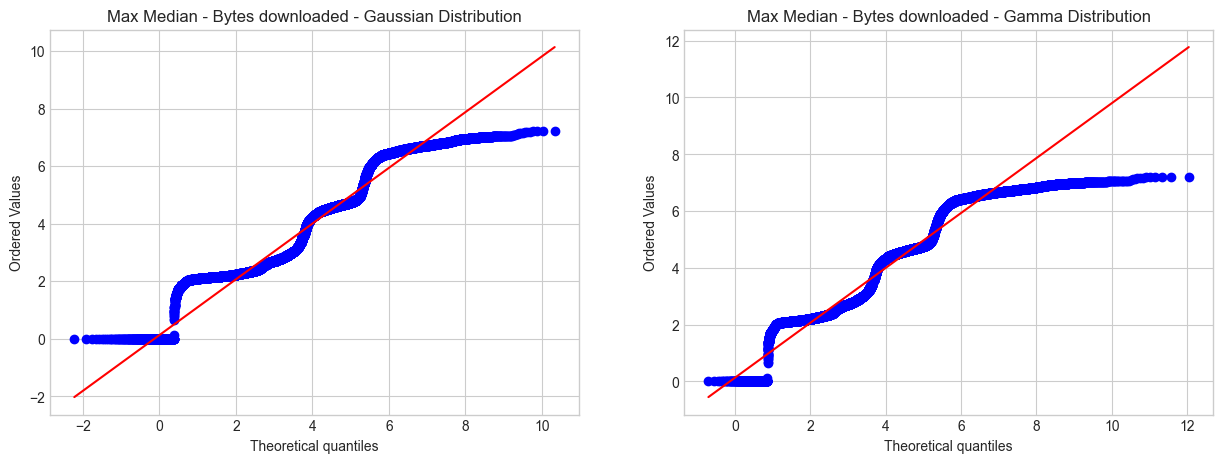

In [32]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = chromeCastMedianDown["bytes_down"]

probplot(dataset, dist=norm, sparams=(chromeCastMedianDownMean, chromeCastMedianDownStd), plot=axes[0])
axes[0].set_title('Max Median - Bytes downloaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(chromeCastMedianDownShape, chromeCastMedianDownLocation, chromeCastMedianDownScale), plot=axes[1])
axes[1].set_title('Max Median - Bytes downloaded - Gamma Distribution')


Text(0.5, 1.0, 'Max Mean - Bytes downloaded - Gamma Distribution')

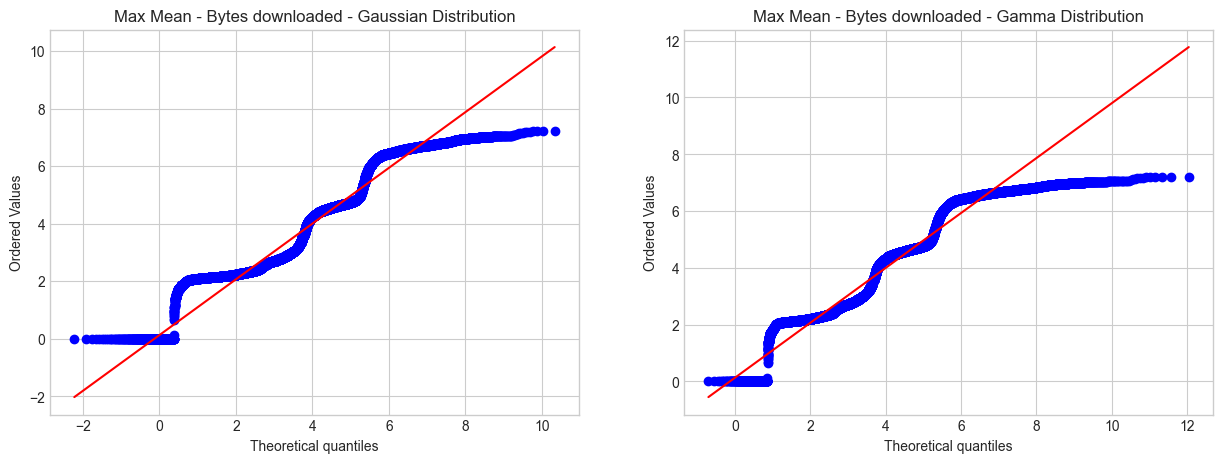

In [33]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = chromeCastMeanDown["bytes_down"]

probplot(dataset, dist=norm, sparams=(chromeCastMeanDownMean, chromeCastMeanDownStd), plot=axes[0])
axes[0].set_title('Max Mean - Bytes downloaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(chromeCastMeanDownShape, chromeCastMeanDownLocation, chromeCastMeanDownScale), plot=axes[1])
axes[1].set_title('Max Mean - Bytes downloaded - Gamma Distribution')


## Caracterização dos horários com maior valor de tráfego - Smart TV

In [34]:
smartTvMedianUpHour = smartTvByHour["bytes_up"].median().idxmax()
smartTvMeanUpHour = smartTvByHour["bytes_up"].mean().idxmax()
smartTvMedianDownHour = smartTvByHour["bytes_down"].median().idxmax()
smartTvMeanDownHour = smartTvByHour["bytes_down"].mean().idxmax()

smartTvMedianUp = smartTvData[smartTvData["hour"] == smartTvMedianUpHour][["hour", "bytes_up", "bytes_down"]]
smartTvMeanUp = smartTvData[smartTvData["hour"] == smartTvMeanUpHour][["hour", "bytes_up", "bytes_down"]]
smartTvMedianDown = smartTvData[smartTvData["hour"] == smartTvMedianDownHour][["hour", "bytes_up", "bytes_down"]]
smartTvMeanDown = smartTvData[smartTvData["hour"] == smartTvMeanDownHour][["hour", "bytes_up", "bytes_down"]]

print("Max Median Upload Hour: ", smartTvMedianUpHour)
print("Max Mean Up Hour: ", smartTvMeanUpHour)
print("Max Median Down Hour: ", smartTvMedianDownHour)
print("Max Mean Down Hour: ", smartTvMeanDownHour)

Max Median Upload Hour:  20
Max Mean Up Hour:  20
Max Median Down Hour:  20
Max Mean Down Hour:  20


Text(0, 0.5, 'Frequency')

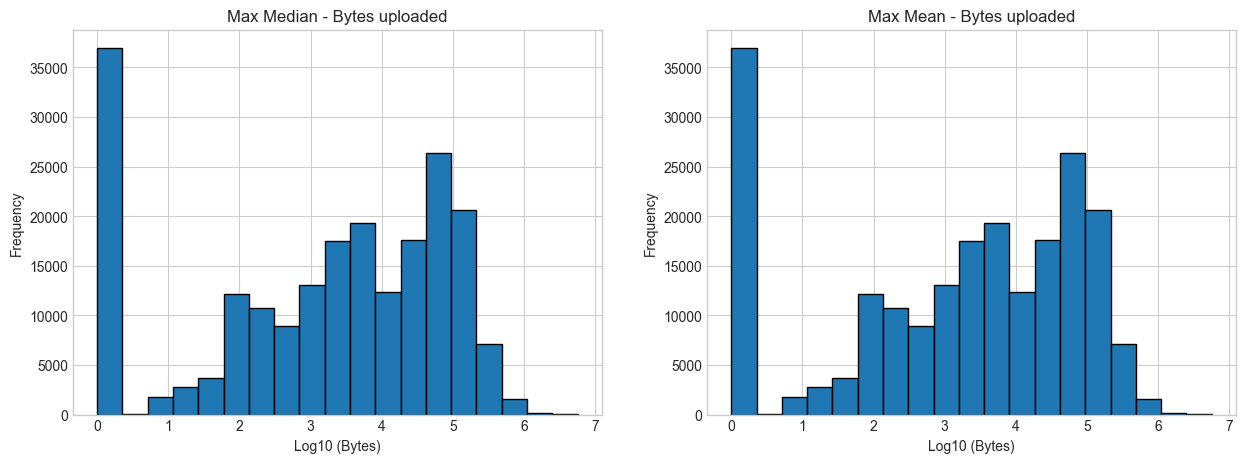

In [35]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

numberBins = bins(smartTvMedianUp["bytes_up"])
plot.subplot(1,2,1)
plot.hist(smartTvMedianUp["bytes_up"], bins = numberBins, ec="black")
plot.title("Max Median - Bytes uploaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

numberBins = bins(smartTvMeanUp["bytes_up"])
plot.subplot(1,2,2)
plot.hist(smartTvMeanUp["bytes_up"], bins = numberBins, ec="black")
plot.title("Max Mean - Bytes uploaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

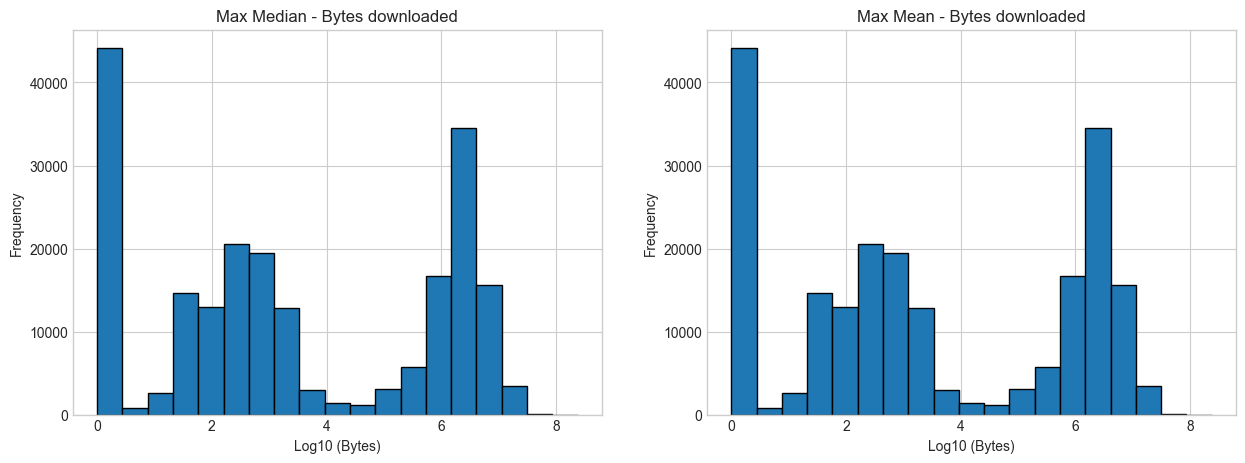

In [36]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

numberBins = bins(smartTvMedianDown["bytes_down"])
plot.subplot(1,2,1)
plot.hist(smartTvMedianDown["bytes_down"], bins = numberBins, ec="black")
plot.title("Max Median - Bytes downloaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

numberBins = bins(smartTvMeanDown["bytes_down"])
plot.subplot(1,2,2)
plot.hist(smartTvMeanDown["bytes_down"], bins = numberBins, ec="black")
plot.title("Max Mean - Bytes downloaded")
plot.xlabel("Log10 (Bytes)")
plot.ylabel("Frequency")

### Gaussian Distribution

In [37]:
smartTvMedianUpMean, smartTvMedianUpStd = norm.fit(smartTvMedianUp["bytes_up"])
smartTvMeanUpMean, smartTvMeanUpStd = norm.fit(smartTvMeanUp["bytes_up"])
smartTvMedianDownMean, smartTvMedianDownStd = norm.fit(smartTvMedianDown["bytes_down"])
smartTvMeanDownMean, smartTvMeanDownStd = norm.fit(smartTvMeanDown["bytes_down"])

print("Median Up - Gaussian Distribution: ")
print(f"Mean: {round(smartTvMedianUpMean, 5)} | Standard Deviation: {round(smartTvMedianUpStd, 5)}\n")

print("Mean Up - Gaussian Distribution: ")
print(f"Mean: {round(smartTvMeanUpMean, 5)} | Standard Deviation: {round(smartTvMeanUpStd, 5)}\n")

print("Median Down - Gaussian Distribution: ")
print(f"Mean: {round(smartTvMedianDownMean, 5)} | Standard Deviation: {round(smartTvMedianDownStd, 5)}\n")

print("Mean Down - Gaussian Distribution: ")
print(f"Mean: {round(smartTvMeanDownMean, 5)} | Standard Deviation: {round(smartTvMeanDownStd, 5)}\n")

Median Up - Gaussian Distribution: 
Mean: 3.12426 | Standard Deviation: 1.7801

Mean Up - Gaussian Distribution: 
Mean: 3.12426 | Standard Deviation: 1.7801

Median Down - Gaussian Distribution: 
Mean: 3.39609 | Standard Deviation: 2.49025

Mean Down - Gaussian Distribution: 
Mean: 3.39609 | Standard Deviation: 2.49025



### Gamma Distribution

In [38]:
smartTvMedianUpShape, smartTvMedianUpLocation, smartTvMedianUpScale = gamma.fit(smartTvMedianUp["bytes_up"])
smartTvMeanUpShape, smartTvMeanUpLocation, smartTvMeanUpScale = gamma.fit(smartTvMeanUp["bytes_up"])
smartTvMedianDownShape, smartTvMedianDownLocation, smartTvMedianDownScale = gamma.fit(smartTvMedianDown["bytes_down"])
smartTvMeanDownShape, smartTvMeanDownLocation, smartTvMeanDownScale = gamma.fit(smartTvMeanDown["bytes_down"])

print("Median Up - Gamma Distribution: ")
print(f"Scale: {round(smartTvMedianUpScale, 5)} | Shape: {round(smartTvMedianUpShape, 5)} | Location: {round(smartTvMedianUpLocation, 5)}\n")

print("Mean Up - Gamma Distribution: ")
print(f"Scale: {round(smartTvMeanUpScale, 5)} | Shape: {round(smartTvMeanUpShape, 5)} | Location: {round(smartTvMeanUpLocation, 5)}\n")

print("Median Down - Gamma Distribution: ")
print(f"Scale: {round(smartTvMedianDownScale, 5)} | Shape: {round(smartTvMedianDownShape, 5)} | Location: {round(smartTvMedianDownLocation, 5)}\n")

print("Mean Down - Gamma Distribution: ")
print(f"Scale: {round(smartTvMeanDownScale, 5)} | Shape: {round(smartTvMeanDownShape, 5)} | Location: {round(smartTvMeanDownLocation, 5)}\n")

Median Up - Gamma Distribution: 
Scale: 0.12424 | Shape: 217.14654 | Location: -23.85961

Mean Up - Gamma Distribution: 
Scale: 0.12424 | Shape: 217.14654 | Location: -23.85961

Median Down - Gamma Distribution: 
Scale: 0.08305 | Shape: 896.54693 | Location: -71.06217

Mean Down - Gamma Distribution: 
Scale: 0.08305 | Shape: 896.54693 | Location: -71.06217



### Histogram with distributions

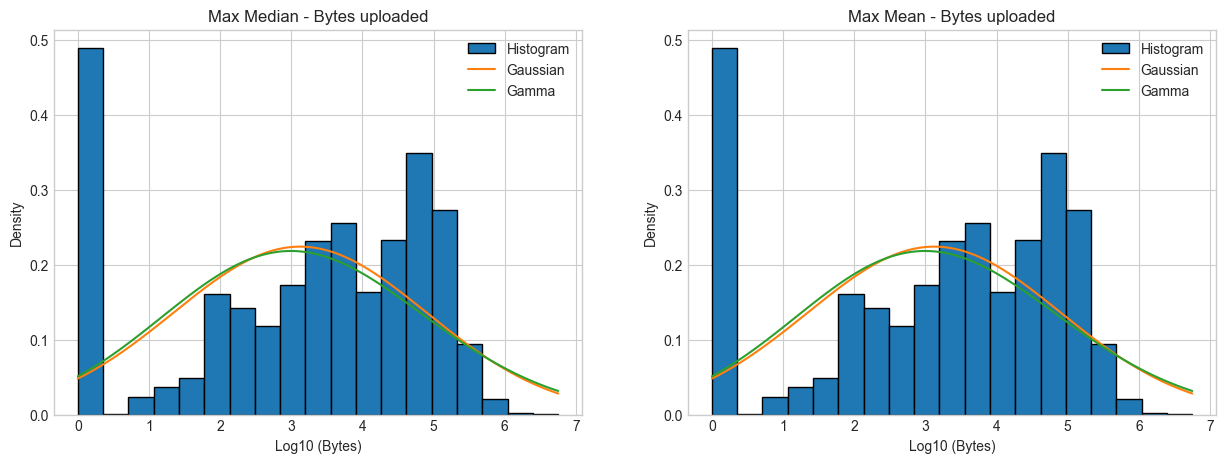

In [39]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)

dataset = smartTvMedianUp["bytes_up"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpaceNorm = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpaceNorm, smartTvMedianUpMean, smartTvMedianUpStd)
plot.plot(graphSpaceNorm, pdf, label="Gaussian")

graphSpaceGamma = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpaceGamma, smartTvMedianUpShape, smartTvMedianUpLocation, smartTvMedianUpScale)
plot.plot(graphSpaceGamma, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Median - Bytes uploaded")
plot.legend()


plot.subplot(1,2,2)

dataset = smartTvMeanUp["bytes_up"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpace = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpace, smartTvMeanUpMean, smartTvMeanUpStd)
plot.plot(graphSpace, pdf, label="Gaussian")

graphSpace = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpace, smartTvMeanUpShape, smartTvMeanUpLocation, smartTvMeanUpScale)
plot.plot(graphSpace, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Mean - Bytes uploaded")
plot.legend()

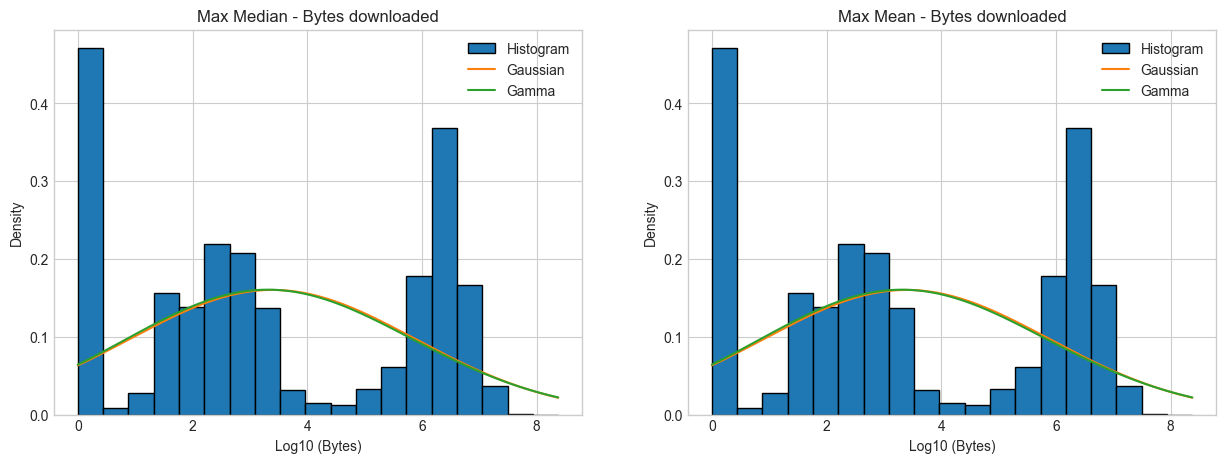

In [40]:
style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.subplot(1,2,1)

dataset = smartTvMedianDown["bytes_down"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpace = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpace, smartTvMedianDownMean, smartTvMedianDownStd)
plot.plot(graphSpace, pdf, label="Gaussian")

graphSpace = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpace, smartTvMedianDownShape, smartTvMedianDownLocation, smartTvMedianDownScale)
plot.plot(graphSpace, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Median - Bytes downloaded")
plot.legend()


plot.subplot(1,2,2)

dataset = smartTvMeanDown["bytes_down"]
numberBins = bins(dataset)

plot.hist(dataset, bins = numberBins, ec="black",density=True, label="Histogram")

graphSpace = np.linspace(dataset.min(), dataset.max(), len(dataset))
pdf = norm.pdf(graphSpace, smartTvMeanDownMean, smartTvMeanDownStd)
plot.plot(graphSpace, pdf, label="Gaussian")

graphSpace = np.linspace(0, dataset.max(), 100)
pdf = gamma.pdf(graphSpace, smartTvMeanDownShape, smartTvMeanDownLocation, smartTvMeanDownScale)
plot.plot(graphSpace, pdf, label="Gamma")

plot.xlabel("Log10 (Bytes)")
plot.ylabel("Density")
plot.title("Max Mean - Bytes downloaded")
plot.legend()

### Probability plots

Text(0.5, 1.0, 'Max Median - Bytes uploaded - Gamma Distribution')

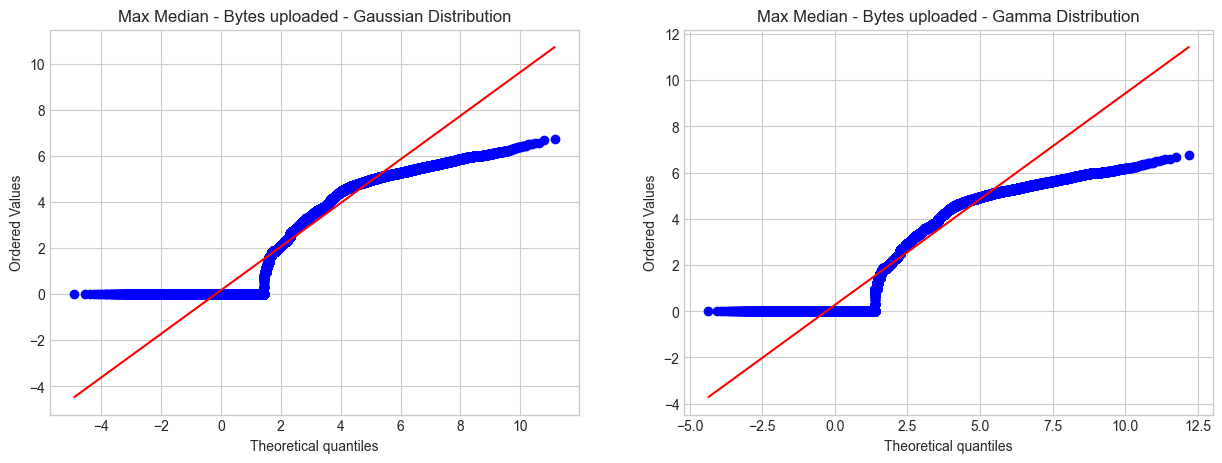

In [41]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = smartTvMedianUp["bytes_up"]

probplot(dataset, dist=norm, sparams=(smartTvMedianUpMean, smartTvMedianUpStd), plot=axes[0])
axes[0].set_title('Max Median - Bytes uploaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(smartTvMedianUpShape, smartTvMedianUpLocation, smartTvMedianUpScale), plot=axes[1])
axes[1].set_title('Max Median - Bytes uploaded - Gamma Distribution')

Text(0.5, 1.0, 'Max Mean - Bytes uploaded - Gamma Distribution')

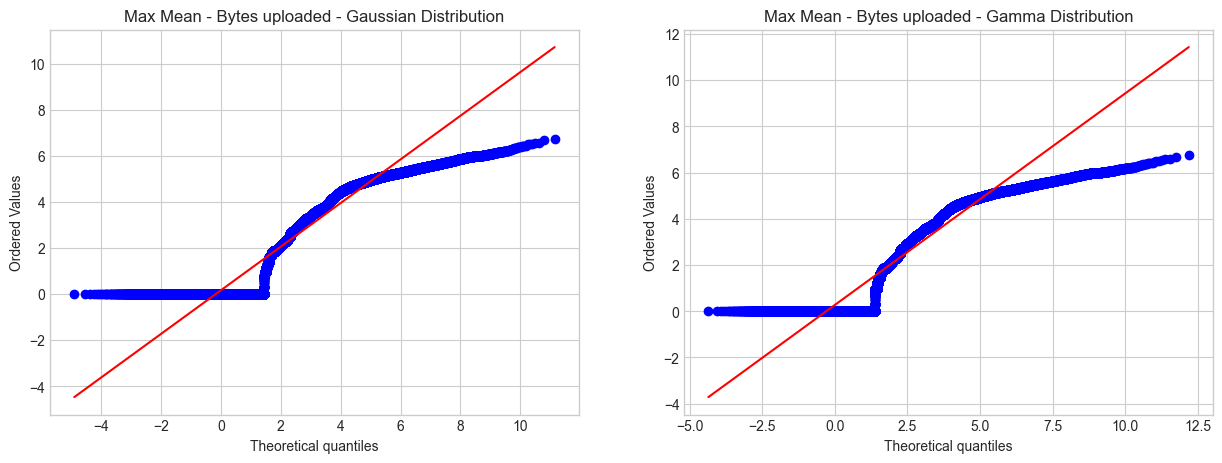

In [42]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = smartTvMeanUp["bytes_up"]

probplot(dataset, dist=norm, sparams=(smartTvMeanUpMean, smartTvMeanUpStd), plot=axes[0])
axes[0].set_title('Max Mean - Bytes uploaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(smartTvMeanUpShape, smartTvMeanUpLocation, smartTvMeanUpScale), plot=axes[1])
axes[1].set_title('Max Mean - Bytes uploaded - Gamma Distribution')

Text(0.5, 1.0, 'Max Mean - Bytes downloaded - Gamma Distribution')

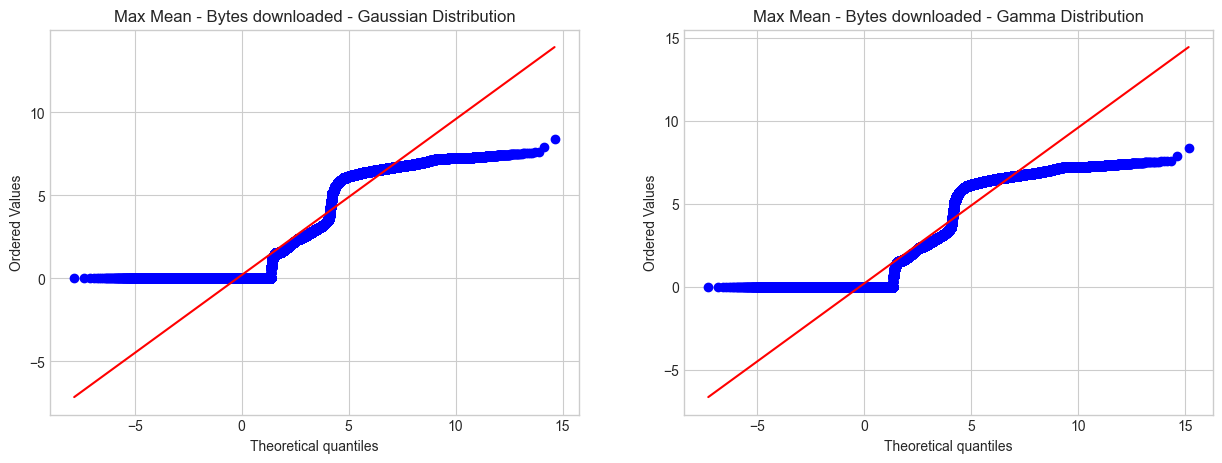

In [43]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = smartTvMedianDown["bytes_down"]

probplot(dataset, dist=norm, sparams=(smartTvMedianDownMean, smartTvMedianDownStd), plot=axes[0])
axes[0].set_title('Max Mean - Bytes downloaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(smartTvMedianDownShape, smartTvMedianDownLocation, smartTvMedianDownScale), plot=axes[1])
axes[1].set_title('Max Mean - Bytes downloaded - Gamma Distribution')

Text(0.5, 1.0, 'Max Mean - Bytes downloaded - Gamma Distribution')

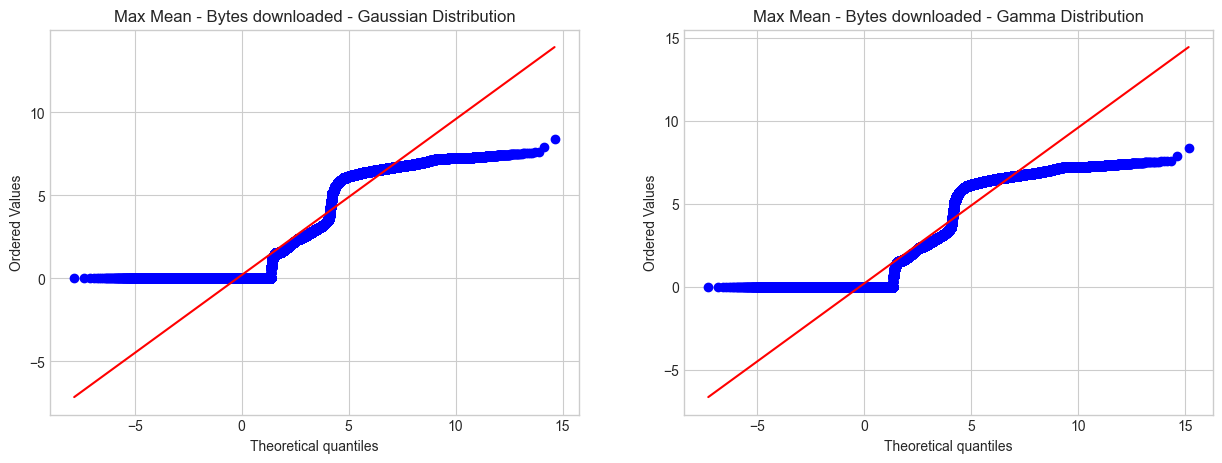

In [44]:
style.use("seaborn-whitegrid")

fig, axes = plot.subplots(1,2,figsize=(15,5))

dataset = smartTvMeanDown["bytes_down"]

probplot(dataset, dist=norm, sparams=(smartTvMeanDownMean, smartTvMeanDownStd), plot=axes[0])
axes[0].set_title('Max Mean - Bytes downloaded - Gaussian Distribution')

probplot(dataset, dist=gamma, sparams=(smartTvMeanDownShape, smartTvMeanDownLocation, smartTvMeanDownScale), plot=axes[1])
axes[1].set_title('Max Mean - Bytes downloaded - Gamma Distribution')

## Correlation Analysis

Chrome Cast Max Median Correlation:  0.7925043015217007


Text(0.5, 1.0, 'Scatter plot - Bytes uploaded x Bytes downloaded - Chrome Cast - Max median')

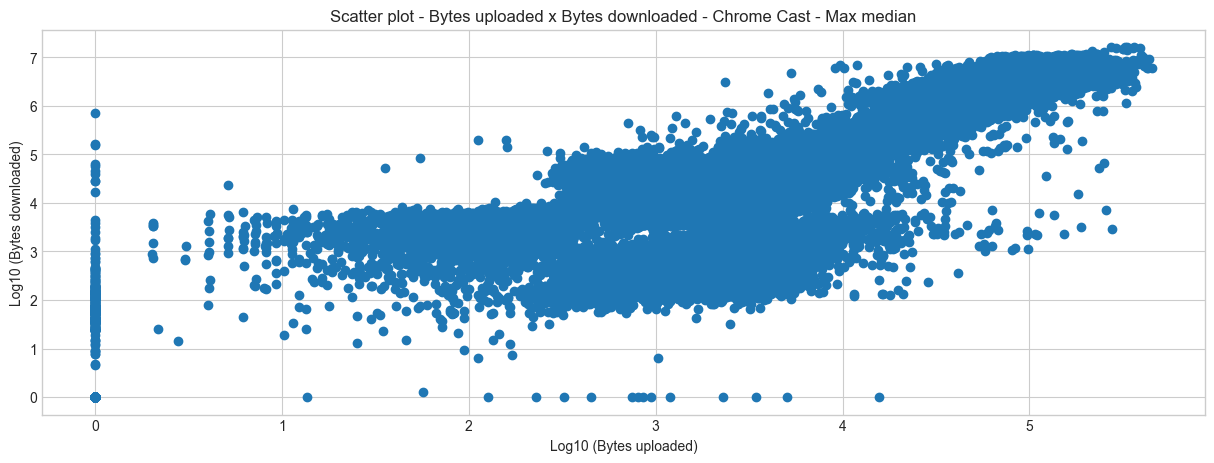

In [45]:
chromeCastMedianCorrelation = pearsonr(chromeCastMedianDown["bytes_up"], chromeCastMedianDown["bytes_down"])[0]

print("Chrome Cast Max Median Correlation: ", chromeCastMedianCorrelation)

style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.scatter(chromeCastMedianDown["bytes_up"], chromeCastMedianDown["bytes_down"])
plot.xlabel("Log10 (Bytes uploaded)")
plot.ylabel("Log10 (Bytes downloaded)")
plot.title("Scatter plot - Bytes uploaded x Bytes downloaded - Chrome Cast - Max median")

Chrome Cast Max Mean Correlation:  0.7925043015217007


Text(0.5, 1.0, 'Scatter plot - Bytes uploaded x Bytes downloaded - Chrome Cast - Max mean')

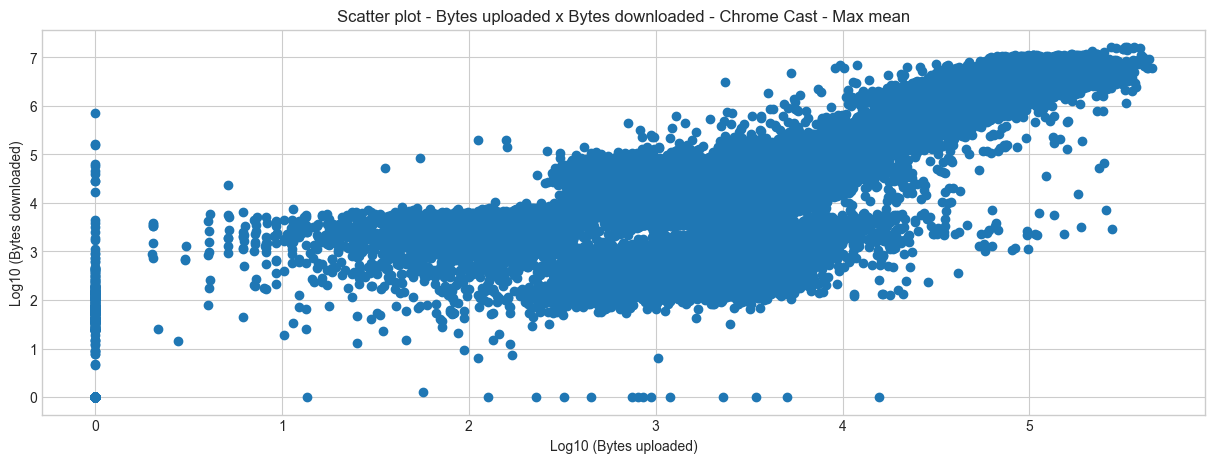

In [46]:
chromeCastMeanCorrelation = pearsonr(chromeCastMeanDown["bytes_up"], chromeCastMeanDown["bytes_down"])[0]

print("Chrome Cast Max Mean Correlation: ", chromeCastMeanCorrelation)

style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.scatter(chromeCastMeanDown["bytes_up"], chromeCastMeanDown["bytes_down"])
plot.xlabel("Log10 (Bytes uploaded)")
plot.ylabel("Log10 (Bytes downloaded)")
plot.title("Scatter plot - Bytes uploaded x Bytes downloaded - Chrome Cast - Max mean")

Smart Tv Max Median Correlation:  0.9156089964784137


Text(0.5, 1.0, 'Scatter plot - Bytes uploaded x Bytes downloaded - Smart Tv - Max median')

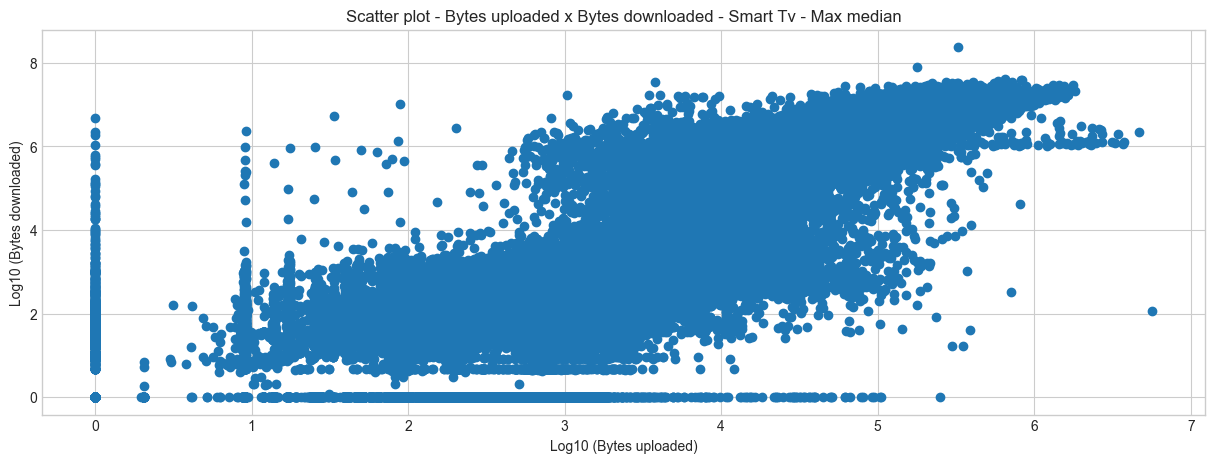

In [47]:
smartTvMedianCorrelation = pearsonr(smartTvMedianUp["bytes_up"], smartTvMedianDown["bytes_down"])[0]

print("Smart Tv Max Median Correlation: ", smartTvMedianCorrelation)

style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.scatter(smartTvMedianUp["bytes_up"], smartTvMedianDown["bytes_down"])
plot.xlabel("Log10 (Bytes uploaded)")
plot.ylabel("Log10 (Bytes downloaded)")
plot.title("Scatter plot - Bytes uploaded x Bytes downloaded - Smart Tv - Max median")

Smart Tv Max Mean Correlation:  0.9156089964784137


Text(0.5, 1.0, 'Scatter plot - Bytes uploaded x Bytes downloaded - Smart Tv - Max mean')

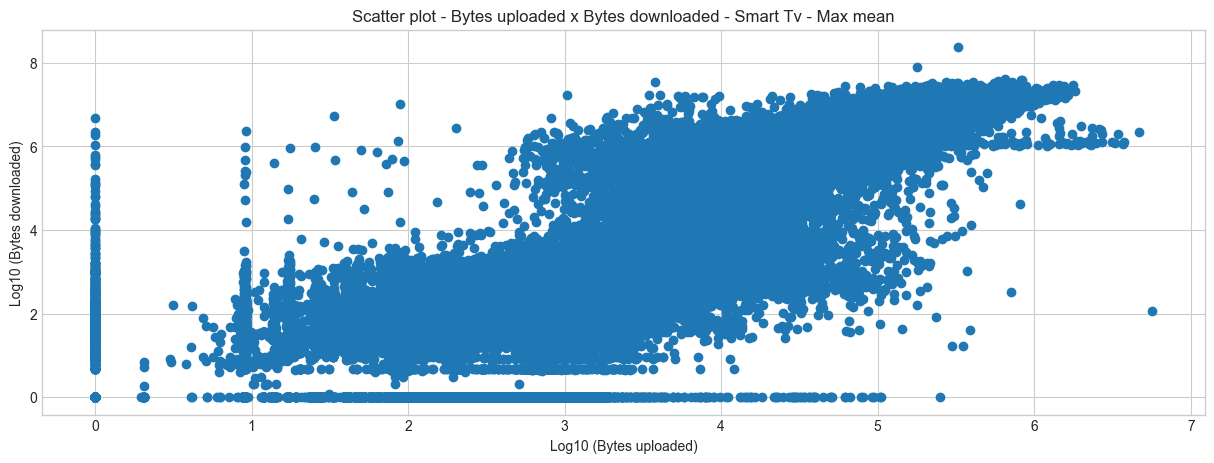

In [48]:
smartTvMeanCorrelation = pearsonr(smartTvMeanUp["bytes_up"], smartTvMeanDown["bytes_down"])[0]

print("Smart Tv Max Mean Correlation: ", smartTvMeanCorrelation)

style.use("seaborn-whitegrid")
plot.figure(figsize=(15,5))

plot.scatter(smartTvMeanUp["bytes_up"], smartTvMeanDown["bytes_down"])
plot.xlabel("Log10 (Bytes uploaded)")
plot.ylabel("Log10 (Bytes downloaded)")
plot.title("Scatter plot - Bytes uploaded x Bytes downloaded - Smart Tv - Max mean")

## Data comparison between Chrome Cast and Smart Tv

In [49]:
def equalizeShapes(dataset1, dataset2):
    if dataset1.shape[0] != dataset2.shape[0]:
        if dataset1.shape[0] > dataset2.shape[0]:
            dataset1 = dataset1.sample(n=dataset2.shape[0])
        else:
            dataset2 = dataset2.sample(n=dataset1.shape[0])
    
    return [dataset1, dataset2]

In [50]:
chromeCastMedianUpObs = chromeCastMedianUp["bytes_up"].value_counts()
smartTvMedianUpObs = smartTvMedianUp["bytes_up"].value_counts()

chromeCastMedianUpObs, smartTvMedianUpObs = equalizeShapes(chromeCastMedianUpObs, smartTvMedianUpObs)

chromeCastMedianUpProb = chromeCastMedianUpObs / chromeCastMedianUpObs.sum()
smartTvMedianUpProb = smartTvMedianUpObs / smartTvMedianUpObs.sum()

g_value, p_value = power_divergence(chromeCastMedianUpProb, smartTvMedianUpProb, lambda_='log-likelihood')
print("Smart Tv x Chrome Cast - Max Median - Upload - G-test, P-value: ", g_value, p_value)

Smart Tv x Chrome Cast - Max Median - Upload - G-test, P-value:  1.2386096081224829 1.0


In [51]:
chromeCastMeanUpObs = chromeCastMeanUp["bytes_up"].value_counts()
smartTvMeanUpObs = smartTvMeanUp["bytes_up"].value_counts()

chromeCastMeanUpObs, smartTvMeanUpObs = equalizeShapes(chromeCastMeanUpObs, smartTvMeanUpObs)

chromeCastMeanUpProb = chromeCastMeanUpObs / chromeCastMeanUpObs.sum()
smartTvMeanUpProb = smartTvMeanUpObs / smartTvMeanUpObs.sum()

g_value, p_value = power_divergence(chromeCastMeanUpProb, smartTvMeanUpProb, lambda_='log-likelihood')
print("Smart Tv x Chrome Cast - Max Mean - Upload - G-test, P-value: ", g_value, p_value)

Smart Tv x Chrome Cast - Max Mean - Upload - G-test, P-value:  1.2692818317422985 1.0


In [52]:
chromeCastMedianDownObs = chromeCastMedianDown["bytes_up"].value_counts()
smartTvMedianDownObs = smartTvMedianDown["bytes_up"].value_counts()

chromeCastMedianDownObs, smartTvMedianDownObs = equalizeShapes(chromeCastMedianDownObs, smartTvMedianDownObs)

chromeCastMedianDownProb = chromeCastMedianDownObs / chromeCastMedianDownObs.sum()
smartTvMedianDownProb = smartTvMedianDownObs / smartTvMedianDownObs.sum()

g_value, p_value = power_divergence(chromeCastMedianDownProb, smartTvMedianDownProb, lambda_='log-likelihood')
print("Smart Tv x Chrome Cast - Max Median - Download - G-test, P-value: ", g_value, p_value)

Smart Tv x Chrome Cast - Max Median - Download - G-test, P-value:  2.2646397361265467 1.0


In [53]:
chromeCastMeanDownObs = chromeCastMeanDown["bytes_up"].value_counts()
smartTvMeanDownObs = smartTvMeanDown["bytes_up"].value_counts()

chromeCastMeanDownObs, smartTvMeanDownObs = equalizeShapes(chromeCastMeanDownObs, smartTvMeanDownObs)

chromeCastMeanDownProb = chromeCastMeanDownObs / chromeCastMeanDownObs.sum()
smartTvMeanDownProb = smartTvMeanDownObs / smartTvMeanDownObs.sum()

g_value, p_value = power_divergence(chromeCastMeanDownProb, smartTvMeanDownProb, lambda_='log-likelihood')
print("Smart Tv x Chrome Cast - Max Mean - Download - G-test, P-value: ", g_value, p_value)

Smart Tv x Chrome Cast - Max Mean - Download - G-test, P-value:  2.1929910493561757 1.0
